                                                                  Soubhik - Upgrad DSC26 PGC Batch.

# -EDA on Loan Case Study-

- Business Objectives
- This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

- In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

- To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

### To ignore the warnings

In [1]:
import warnings

warnings.filterwarnings('ignore')

### To import the necessary Python package

In [2]:
import numpy as np
import pandas as pd
import itertools 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

### Importing dataset from the file location

In [3]:
application_data = pd.read_csv('G:\\PG CERTIFICATION IN DATA SCIENCE-UPGRAD\\FEB 2021\\23.FEB.2021\\EDA\\application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
application_data.shape

(307511, 122)

- The imported dateset has 307511 rows and 122 columns

In [5]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### Inspecting the Data Types of all the columns

In [6]:
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

### To find-out the number of null values under each columns 

In [7]:
# In pandas library, we are setting an option to make the output visible for better understanding.

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [8]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Finding out the percentage of null values under each rows

In [9]:
percentage_null_value = round(application_data.isnull().sum()/len(application_data)*100.00,2)
percentage_null_value.sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [10]:
# Data partition as per the target value into the new variables respectively

# TARGET-0 == Non-Defaulters
# TARGET-1 == Defaulters

loan_defaulted = application_data[application_data['TARGET']==1]
loan_defaulted.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,NaN,0.306841,0.320163,0.1309,0.1250,0.9960,0.9456,0.0822,0.16,0.1379,0.2500,0.2917,0.0142,0.1059,0.1267,0.0039,0.0078,0.1334,0.1297,0.9960,0

In [11]:
loan_not_defaulted = application_data[application_data['TARGET']==0]
loan_not_defaulted.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash l

### To check the imbalance of the given target variable of the Dataset
#### We are plotting countplot to understand the same 

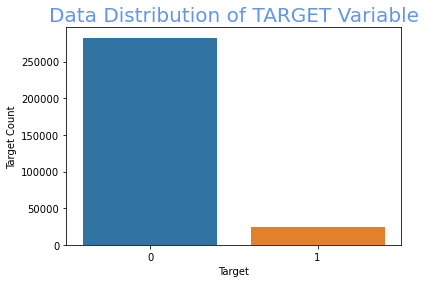

In [12]:
sns.countplot(application_data['TARGET'])
plt.title('Data Distribution of TARGET Variable',fontsize=20, color='cornflowerblue')
plt.xlabel('Target')
plt.ylabel('Target Count')
plt.show()

- From the above plot we can infer that there is a data imbalance in the dataset. The non-defaulters are pretty much higher than the defaulters.
- The non-defaulters are more than 250000 and defaulters are less than 50000 according to the above plot.

### Let us find the ratio of the above mentioned imbalanced dataset 

In [13]:
print('The percentage of Defaulters     : ', round(len(loan_defaulted)/len(application_data)*100.00,2) )
print('The percentage of Non-Defaulters : ', round(len(loan_not_defaulted)/len(application_data)*100.00,2) )
print('The ratio of data imbalance is   : ', round(len(loan_not_defaulted)/len(loan_defaulted),2) )

The percentage of Defaulters     :  8.07
The percentage of Non-Defaulters :  91.93
The ratio of data imbalance is   :  11.39


### Identifying the missing values in the dataset

In [14]:
null_values = application_data.isnull().sum()
unique_values = application_data.nunique()
data_types = application_data.dtypes

In [15]:
arranged_data = pd.concat([percentage_null_value, null_values, unique_values, data_types], axis=1, keys=['Percentage_null_value','Null_Values', 'Unique_values', 'Data_types']).sort_values(by="Percentage_null_value", ascending=False)
arranged_data

,Percentage_null_value,Null_Values,Unique_values,Data_types
COMMONAREA_MEDI,69.87,214865,3202,float64
COMMONAREA_AVG,69.87,214865,3181,float64
COMMONAREA_MODE,69.87,214865,3128,float64
NONLIVINGAPARTMENTS_MODE,69.43,213514,167,float64
NONLIVINGAPARTMENTS_AVG,69.43,213514,386,float64
NONLIVINGAPARTMENTS_MEDI,69.43,213514,214,float64
FONDKAPREMONT_MODE,68.39,210295,4,object
LIVINGAPARTMENTS_MODE,68.35,210199,736,float64
LIVINGAPARTMENTS_AVG,68.35,210199,1868,float64
LIVINGAPARTMENTS_MEDI,68.35,210199,1097,float64


### -Now that we have found the missing values in the dataset , we shall treat it by dropping the above columns from the dataframe whichever is equal or above 45% of null values.

In [16]:
# First we shall list out the columns which are missing values for more or equal to 45%

big_missing_values_columns = percentage_null_value[percentage_null_value>=45]
big_missing_values_columns.sort_values(ascending=False)

COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
COMMONAREA_MEDI                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_MEDI                66.50
OWN_CAR_AGE                     65.99
LANDAREA_AVG                    59.38
LANDAREA_MODE                   59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_MODE               58.52
BASEMENTAREA_AVG                58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [17]:
# Now, we shall drop the columns as we have mentioned in the above objective.

application_data_drop = application_data.drop(columns=big_missing_values_columns.index)
application_data_drop.shape

(307511, 73)

- Now we can notice here that the number of columns are reduced to 73 from 122 after dropping the columns as mentioned above.

In [18]:
# We are now checking the missing values equal or below 15% in the dataset

small_missing_data_columns = percentage_null_value[(percentage_null_value<=15) & (percentage_null_value>0)].sort_values(ascending=False)
small_missing_data_columns

AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

- Now that we have listed out the variables which are having missing values less than or equal to 15%. We shall check the each possible variable and try to determine the possible value for impuation those which are equal to close to 13% of the dataset.

In [19]:
# Small missing values which are more than or equal to 13% and less than or equal to 15% of the data frame

small_missing_data_columns_1 = small_missing_data_columns[small_missing_data_columns >= 13]
small_missing_data_columns_1

AMT_REQ_CREDIT_BUREAU_YEAR    13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
dtype: float64

In [20]:
# let us make sure of the null values before imputing it.

application_data_drop[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
dtype: int64

In [21]:
# We shall also take out the information of those values.

application_data_drop[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [22]:
application_data_drop[['EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].head(10)

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT
0,0.139376,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,0.621226,1.0,0.0,0.0,0.0,0.0,1.0
6,0.492060,2.0,1.0,0.0,0.0,0.0,1.0
7,0.540654,0.0,0.0,0.0,0.0,0.0,0.0
8,0.751724,1.0,0.0,0.0,0.0,0.0,0.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# let us take the unique value for the above variables

print("Missing Value Variables    : Unique Values")
print("AMT_REQ_CREDIT_BUREAU_YEAR :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_YEAR'].nunique())
print("AMT_REQ_CREDIT_BUREAU_MON  :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_MON'].nunique())
print("AMT_REQ_CREDIT_BUREAU_WEEK :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_WEEK'].nunique())
print("AMT_REQ_CREDIT_BUREAU_DAY  :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_DAY'].nunique())
print("AMT_REQ_CREDIT_BUREAU_HOUR :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].nunique())
print("AMT_REQ_CREDIT_BUREAU_QRT  :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_QRT'].nunique())

Missing Value Variables    : Unique Values
AMT_REQ_CREDIT_BUREAU_YEAR : 25
AMT_REQ_CREDIT_BUREAU_MON  : 24
AMT_REQ_CREDIT_BUREAU_WEEK : 9
AMT_REQ_CREDIT_BUREAU_DAY  : 9
AMT_REQ_CREDIT_BUREAU_HOUR : 5
AMT_REQ_CREDIT_BUREAU_QRT  : 11


In [24]:
# This step is to see the mode of the above mentioning variable.

print("Missing Value Variables    : Mode")
print("AMT_REQ_CREDIT_BUREAU_YEAR :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())
print("AMT_REQ_CREDIT_BUREAU_MON  :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_MON'].mode())
print("AMT_REQ_CREDIT_BUREAU_WEEK :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
print("AMT_REQ_CREDIT_BUREAU_DAY  :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_DAY'].mode())
print("AMT_REQ_CREDIT_BUREAU_HOUR :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())
print("AMT_REQ_CREDIT_BUREAU_QRT  :",        application_data_drop['AMT_REQ_CREDIT_BUREAU_QRT'].mode())

Missing Value Variables    : Mode
AMT_REQ_CREDIT_BUREAU_YEAR : 0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_MON  : 0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_WEEK : 0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_DAY  : 0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_HOUR : 0    0.0
dtype: float64
AMT_REQ_CREDIT_BUREAU_QRT  : 0    0.0
dtype: float64


- Since, we see that the mode of these variables are 0 and also these variables are categorical and the null values can be replaced with 0.

In [25]:
# Since the mode is 0 in all the above variables, we may fill the null values with 0s.

m1 = 0
application_data_drop['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(m1, inplace=True)
application_data_drop['AMT_REQ_CREDIT_BUREAU_MON'].fillna(m1, inplace=True)
application_data_drop['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(m1, inplace=True)
application_data_drop['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(m1, inplace=True)
application_data_drop['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(m1, inplace=True)
application_data_drop['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(m1, inplace=True)

In [26]:
# Re-Checking the variables for the null values.

print('Variables                 : Null Values\n')
application_data_drop[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].isnull().sum()

Variables                 : Null Values



AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

In [27]:
# we found these cols to be unwanted/ not required so we will drop them for further analysis

drop_cols = ['NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE',
             'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
             'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
             'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
             'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
             'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
             'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',  'FLAG_DOCUMENT_3',
             'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',  'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
             'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
             'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
             'FLAG_DOCUMENT_17',  'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
             'FLAG_DOCUMENT_21']

application_data_drop.drop(columns=drop_cols, inplace=True)
application_data_drop.shape

(307511, 28)

- Now after dropping the unwanted columns we can see the reduction in the number of columns from 73 to 28.

In [28]:
# Small missing values which are less than 13% of the data frame

small_missing_data_columns_2 = small_missing_data_columns[small_missing_data_columns <= 13]
small_missing_data_columns_2

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
EXT_SOURCE_2                0.21
AMT_GOODS_PRICE             0.09
dtype: float64

- The column 'NAME_TYPE_SUITE' has 'object' values, we may replace the null/ missing values with NaN values.
- The rest of the columns ('DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE') are float types, we may replace the null/ missing values with the median of these columns respectively.

In [29]:
# Let us arrange the data as per the preferences for better understanding.

arranged_data.sort_values(by=['Percentage_null_value','Unique_values','Data_types'],ascending=False)

,Percentage_null_value,Null_Values,Unique_values,Data_types
COMMONAREA_MEDI,69.87,214865,3202,float64
COMMONAREA_AVG,69.87,214865,3181,float64
COMMONAREA_MODE,69.87,214865,3128,float64
NONLIVINGAPARTMENTS_AVG,69.43,213514,386,float64
NONLIVINGAPARTMENTS_MEDI,69.43,213514,214,float64
NONLIVINGAPARTMENTS_MODE,69.43,213514,167,float64
FONDKAPREMONT_MODE,68.39,210295,4,object
LIVINGAPARTMENTS_AVG,68.35,210199,1868,float64
LIVINGAPARTMENTS_MEDI,68.35,210199,1097,float64
LIVINGAPARTMENTS_MODE,68.35,210199,736,float64


- We have replaced the null values in the above mentioned variables and now the null value is nil.

- In the above data, we have sorted all the variables according to their unique values with respect to their percentage of null or missing values. 
- In which unique value 2 may represent the flagged variable such as Yes or No which is in interger data type in the data set.
- We will check the importance of the each variable and we may drop or ignore whichever is not so important for the analysis.
- After dropping the unimportant variables, we may be left with crisp and clear dataset for further analysis.

In [30]:
# Let us make sure of the data dimension.

application_data_drop.shape

(307511, 28)

###  value_counts( ) functions plays important role in understanding the deviations among the variable.

In [31]:
application_data_drop['NAME_CONTRACT_TYPE'].value_counts() 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [32]:
application_data_drop['CODE_GENDER'].value_counts() 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [33]:
application_data_drop['FLAG_OWN_REALTY'].value_counts() 

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [34]:
application_data_drop['FLAG_OWN_CAR'].value_counts() 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [35]:
application_data_drop['NAME_INCOME_TYPE'].value_counts() 

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [36]:
application_data_drop['NAME_EDUCATION_TYPE'].value_counts() 

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [37]:
application_data_drop['NAME_FAMILY_STATUS'].value_counts() 

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [38]:
application_data_drop['NAME_HOUSING_TYPE'].value_counts() 

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [39]:
application_data_drop['OCCUPATION_TYPE'].value_counts() 

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [40]:
application_data_drop['ORGANIZATION_TYPE'].value_counts() 

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [41]:
# We are filtering variables which are having null-values less than or equal to 45%

arranged_data[arranged_data['Percentage_null_value']<=45]

,Percentage_null_value,Null_Values,Unique_values,Data_types
OCCUPATION_TYPE,31.35,96391,18,object
EXT_SOURCE_3,19.83,60965,814,float64
AMT_REQ_CREDIT_BUREAU_HOUR,13.50,41519,5,float64
AMT_REQ_CREDIT_BUREAU_DAY,13.50,41519,9,float64
AMT_REQ_CREDIT_BUREAU_WEEK,13.50,41519,9,float64
AMT_REQ_CREDIT_BUREAU_MON,13.50,41519,24,float64
AMT_REQ_CREDIT_BUREAU_QRT,13.50,41519,11,float64
AMT_REQ_CREDIT_BUREAU_YEAR,13.50,41519,25,float64
NAME_TYPE_SUITE,0.42,1292,7,object
DEF_30_CNT_SOCIAL_CIRCLE,0.33,1021,10,float64


In [42]:
# We need to workout on few columns to get it into the right format to make sense.

application_data_drop[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
...,...,...,...,...
307506,-9327,-236,-8456.0,-1982
307507,-20775,365243,-4388.0,-4090
307508,-14966,-7921,-6737.0,-5150
307509,-11961,-4786,-2562.0,-931


- We can notice here that the dates and days in the data are in negative values and which is not relavant. So, we need to rectify this.

In [43]:
# let us get the summary of the above mentioned variables.

application_data_drop[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [44]:
# Here we are converting the negative values to positive and 
# we are also converting it from number of days to number of years.

In [45]:
application_data_drop[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].head(10)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458
5,-16941,-1588,-4970.0,-477
6,-13778,-3130,-1213.0,-619
7,-18850,-449,-4597.0,-2379
8,-20099,365243,-7427.0,-3514
9,-14469,-2019,-14437.0,-3992


In [46]:
application_data_drop[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [47]:
# We are going to convert days to years to make data more sensible by using abs() function. 
# we shall make it positive value and then divide it by 365 days.

days_years = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
application_data_drop[days_years] = application_data_drop[days_years].abs()
application_data_drop[days_years] = application_data_drop[days_years]/365
application_data_drop[days_years].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [48]:
#Similarly after converting the values from days to year, we must also rename the variable name days to years simultaneously.

application_data_drop.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH' ,'DAYS_EMPLOYED':'YEARS_EMPLOYED' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'}, inplace=True)

### Now we will start working on gender column

In [49]:
# By value_counts() we can see the deviation between the categories in the variable.

application_data_drop['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [50]:
# Describe() functions gives us the summary of the variables.

application_data_drop['CODE_GENDER'].describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

- Here we can notice that the categorical variable is having mode as 'Female' with the frequency of 202448 out of 307511. Hence, we may replace those XNA with 'Female' itself.

In [51]:
application_data_drop['CODE_GENDER'].mode()

0    F
dtype: object

In [52]:
application_data_drop.loc[application_data_drop['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
application_data_drop['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [53]:
application_data_drop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,0.0,0.0


## Checking out on outliers on the dataset


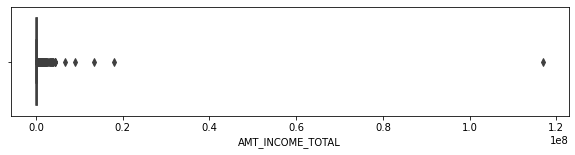

In [54]:
# Plot for the annual income of the clients to compare the other factors such as annuity, loan amount etc,.

plt.figure(figsize=(10,2))
sns.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()

In [55]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [56]:
print('Max : ',application_data.AMT_INCOME_TOTAL.max())
print('Mode : ',application_data.AMT_INCOME_TOTAL.mode())
print('Mean : ',application_data.AMT_INCOME_TOTAL.mean())
print('Median : ',application_data.AMT_INCOME_TOTAL.median())

Max :  117000000.0
Mode :  0    135000.0
dtype: float64
Mean :  168797.9192969845
Median :  147150.0


In [57]:
application_data.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.75,0.77,0.76,0.79,0.8,0.85,0.9,0.95,0.99,1.0])

0.50       147150.0
0.70       180000.0
0.75       202500.0
0.77       211500.0
0.76       202500.0
0.79       225000.0
0.80       225000.0
0.85       234000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [58]:
application_data[application_data['AMT_INCOME_TOTAL'] == application_data['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0688,NaN,0.0615,NaN,NaN,0.105,0.0983,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.0704,NaN,0.0641,NaN,NaN,0.1041,0.0947,0.9791,NaN,NaN,0.0,0.2069,0.1667,NaN,0.07,NaN,0.0626,NaN,NaN,NaN,block of flats,0.0715,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
# To remove the outlier we have used below function and plot the box again to see the difference from previous boxplot.

application_data=application_data[application_data.AMT_INCOME_TOTAL<np.nanpercentile(application_data['AMT_INCOME_TOTAL'], 99)]

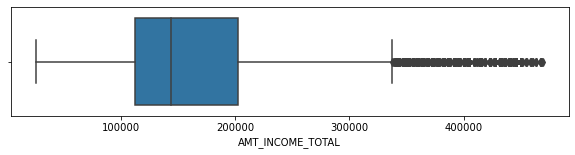

In [60]:
plt.figure(figsize=(10,2))
sns.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()

- From the above boxplot and the details we can come to conclusion that there is one outlier which can be ignored. And we can also say that most people with payment have incomes in the lower range between 100000 to 200000 and + or near by.

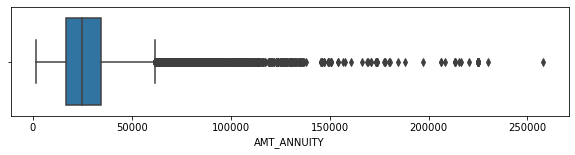

In [61]:
# Plot for the loan annuity to determine the scale of it with the annual income of the clients.

plt.figure(figsize=(10,2))
sns.boxplot(application_data_drop['AMT_ANNUITY'])
plt.show()

- With the above plot we can infer that the loan annuity is within the margin of the annual income of the clients. Which is the basic criteria of the loans and it is been followed legitimately.

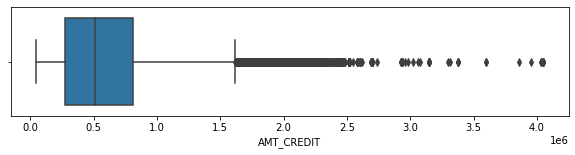

In [62]:
# Plot for the loan sanction amount of the clients.

plt.figure(figsize=(10,2))
sns.boxplot(application_data_drop['AMT_CREDIT'])
plt.show()

In [63]:
application_data_drop['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

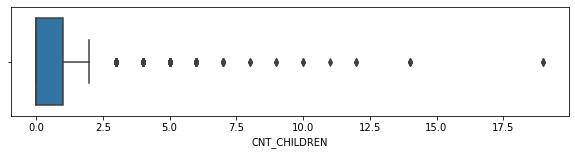

In [64]:
# The box plot for the variable 'CNT_CHILDREN'

plt.figure(figsize=(10,2))
sns.boxplot(application_data_drop['CNT_CHILDREN'])
plt.show()

- Here from the above plot we can easily say that number of children the clients are having some values are unreasonably high, which is not possible and it can be treated as outlier

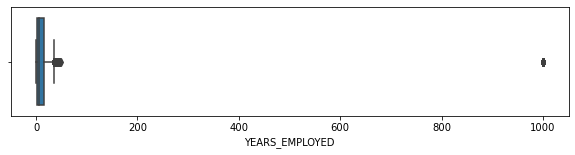

In [65]:
# plot for the number of years clients employed in current organization before availing the loan.

plt.figure(figsize=(10,2))
sns.boxplot(application_data_drop['YEARS_EMPLOYED'])
plt.show()

In [66]:
application_data_drop['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

- From the above plots of loan credit amount and number of years employed in the current organization are quite natural excluding the outliers which is unconsiderable.

## Univariate and Segmented Analysis of the Dataframe

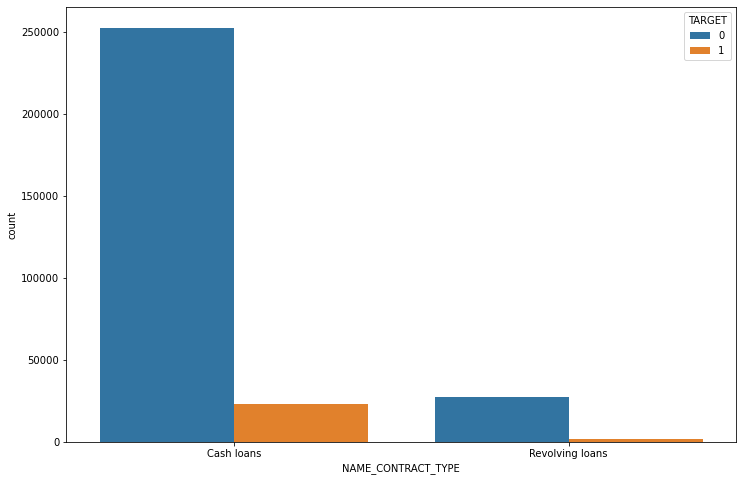

In [67]:
# Let us try to relate the cash and revolving loans with the target value. i.e loan Defaulters and loan Non-Defaulters

plt.figure(figsize=[12,8])
sns.countplot(data=application_data, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.show()

- As we already know that 'TARGET' variable is a categorical variable stating loan defaulters and non-defaulters as 1 and 0 respectively. 
- Here with the help of above countplot we can observe that cash loans are much higher than revolving loans for both the case i.e, Target 0 & 1 or non-defaulters & defaulters.

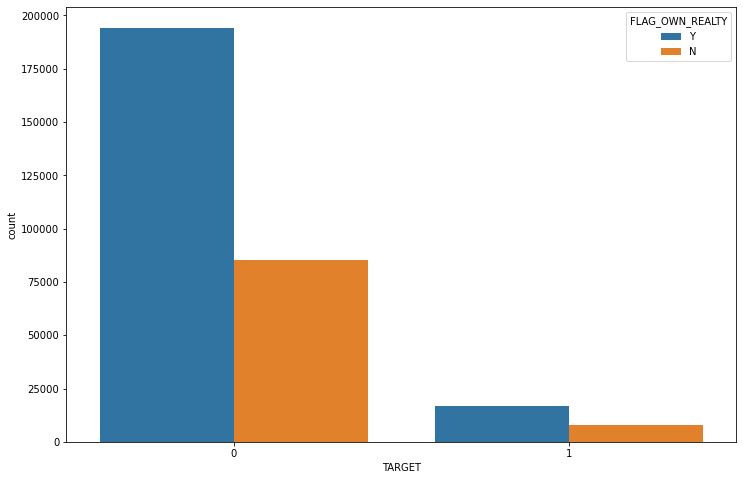

In [68]:
# Similarly we are trying to plot another count plot to compare targets with the clients whether having residential property or not. 

plt.figure(figsize=[12,8])
sns.countplot(data=application_data, x='TARGET', hue='FLAG_OWN_REALTY')
plt.show()

- According to the plot the non-deafulters are much higher than the defaulters those who are holding residential property.

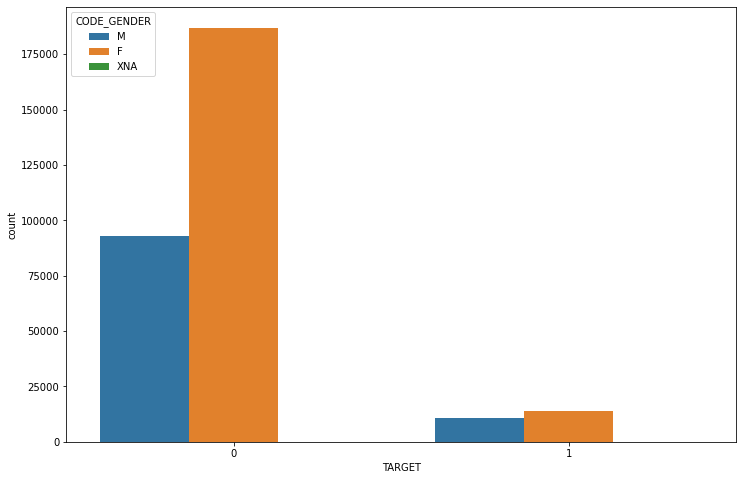

In [69]:
# Now let us try to understand what would be the gender category with target given.

plt.figure(figsize=[12,8])
sns.countplot(data=application_data, x='TARGET', hue='CODE_GENDER')
plt.show()

-  This is an interesting observation that female polulation are like more in the both cases.

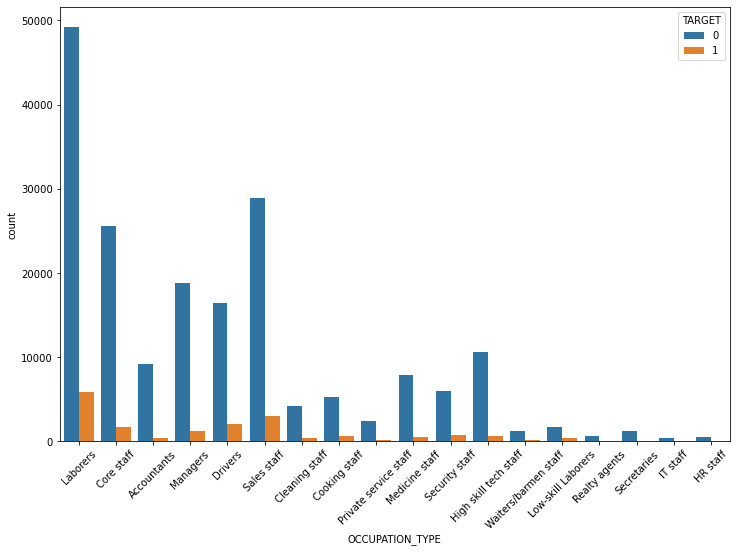

In [70]:
# We are plotting just here to understand how target variables play role among the occupation categories.

plt.figure(figsize=[12,8])
sns.countplot(data=application_data, x='OCCUPATION_TYPE', hue='TARGET')
plt.xticks(rotation=45)
plt.show()

- The plot says that the laborers are the higher among all the other occupation type in all the cases.

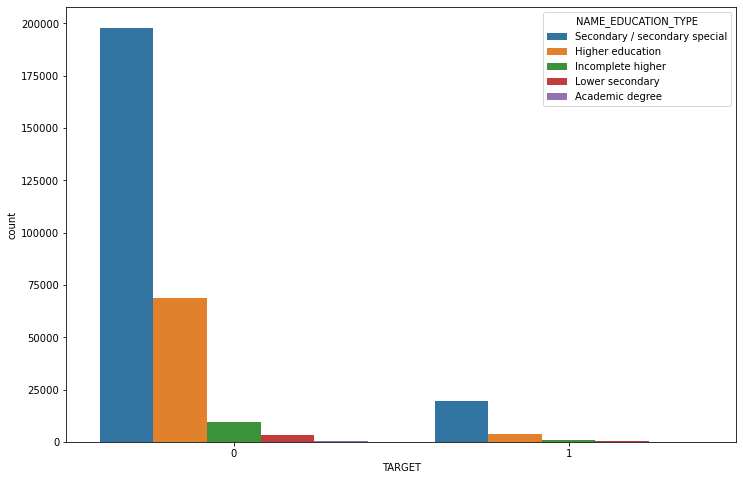

In [71]:
# Let us now try to understand how the educational classes relate directly towards the quality of the clients who opted loans.

plt.figure(figsize=[12,8])
sns.countplot(data=application_data, x='TARGET', hue='NAME_EDUCATION_TYPE')
plt.show()

- We have plotted between educational classes and the target variable.

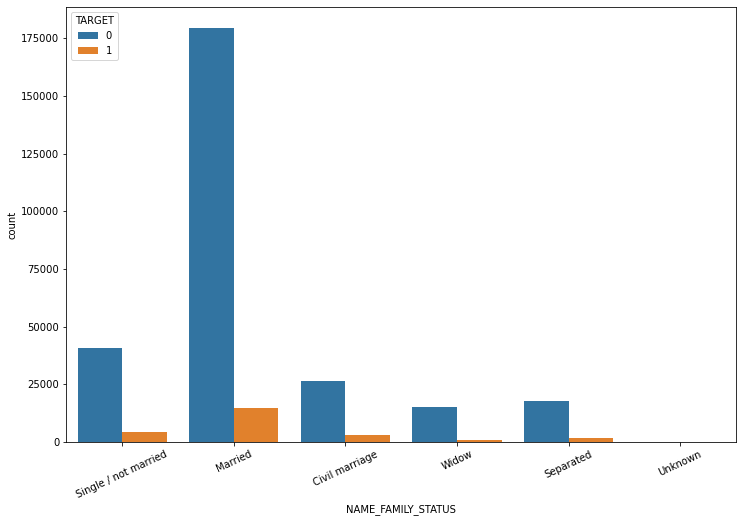

In [72]:
# We shall also try to know what kind of family status are good in loan repayments.

plt.figure(figsize=[12,8])
sns.countplot(data=application_data, x='NAME_FAMILY_STATUS', hue='TARGET')
plt.xticks(rotation=25)
plt.show()

- Above plot gives a inference that the married people are likely to be more defaulters.

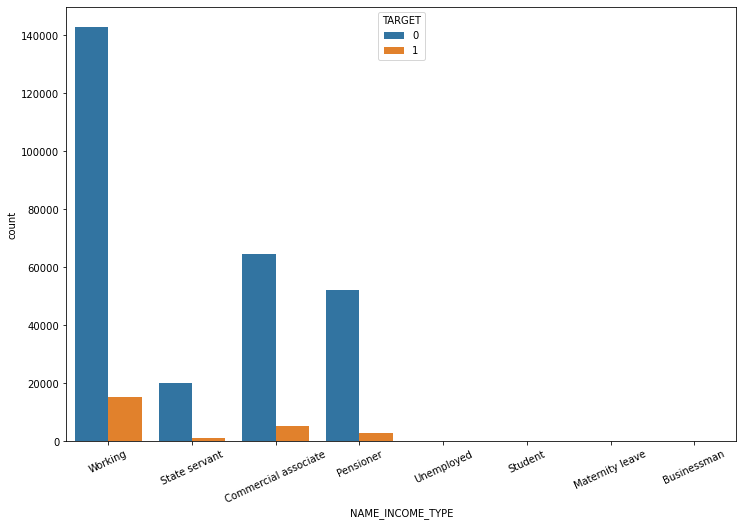

In [73]:
# Let us now plot a figure to understand the relation between different income types with the target variable.

plt.figure(figsize=[12,8])
sns.countplot(data=application_data, x='NAME_INCOME_TYPE', hue='TARGET')
plt.xticks(rotation=25)
plt.show()

- This leads us to infer that working professionals are likely more among both targets and also we can notice that businessman is not in the higher scale as expected.

## We are now supposed to find the appropriate formats for the variables.

In [74]:
application_data_drop.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
YEARS_BIRTH                    17460
YEARS_EMPLOYED                 12574
YEARS_REGISTRATION             15688
YEARS_ID_PUBLISH                6168
OCCUPATION_TYPE                   18
CNT_FAM_MEMBERS                   17
ORGANIZATION_TYPE                 58
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
A

In [75]:
application_data_drop.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
YEARS_BIRTH                   float64
YEARS_EMPLOYED                float64
YEARS_REGISTRATION            float64
YEARS_ID_PUBLISH              float64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
ORGANIZATION_TYPE              object
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CRED

- Now from the above details we can make out the difference among the unique values and dtypes. We are supposed to change few variables to categorical value  for further analysis.

In [76]:
# we need to create the list of columns to convert them to categorical data:

cols_converted = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                        'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in cols_converted:
    application_data_drop[i] = application_data_drop[i].astype('category')

In [77]:
application_data_drop.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  int64   
 1   TARGET                      307511 non-null  category
 2   NAME_CONTRACT_TYPE          307511 non-null  category
 3   CODE_GENDER                 307511 non-null  category
 4   FLAG_OWN_CAR                307511 non-null  category
 5   FLAG_OWN_REALTY             307511 non-null  category
 6   CNT_CHILDREN                307511 non-null  category
 7   AMT_INCOME_TOTAL            307511 non-null  float64 
 8   AMT_CREDIT                  307511 non-null  float64 
 9   AMT_ANNUITY                 307499 non-null  float64 
 10  AMT_GOODS_PRICE             307233 non-null  float64 
 11  NAME_INCOME_TYPE            307511 non-null  category
 12  NAME_EDUCATION_TYPE         307511 non-null  category
 13 

## BINNING

### As we know already to deal with continous values in the dataframe, we may choose to bin the value ranges which helps us in the analysis.

In [78]:
#CREATING BINS FOR AMOUNT_CREDIT_RANGE :
bins = [0, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000,
        850000, 900000, 1000000000]
ranges = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
          '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
          '800000-850000','850000-900000','900000 and above']

# let us assign new column in the data frame.
application_data_drop['CREDIT_RANGE'] = pd.cut(application_data_drop['AMT_CREDIT'], bins, labels = ranges) 

In [79]:
# We need to check the additon of column by taking the head of the data.

application_data_drop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,500000-550000


### Let us plot to understand data for our analysis

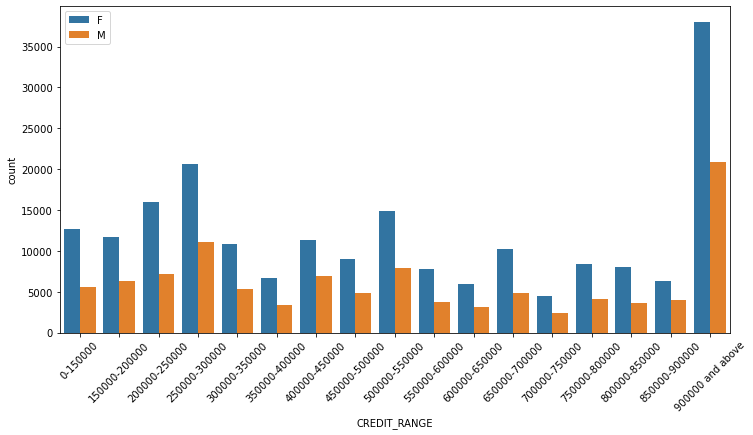

In [80]:
# COUNT PLOT 'CREDIT_RANGE' WITH 'CODE_GENDER':
plt.figure(figsize=(12,6)) 
sns.countplot(data = application_data_drop, x = 'CREDIT_RANGE', hue = 'CODE_GENDER')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [81]:
# CREATING BINS FOR INCOME RANGE.
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000,
        400000, 425000, 450000, 475000, 500000, 10000000000]
ranges = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000',
          '175000-200000', '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000',
          '350000-375000', '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

# let us assign another new column in the data frame.
application_data_drop['INCOME_RANGE'] = pd.cut(application_data_drop['AMT_INCOME_TOTAL'], bins, labels = ranges)

In [82]:
# let's check the head of the data to confirm the column addition:

application_data_drop.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE,INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,400000-450000,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0-150000,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,300000-350000,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,500000-550000,100000-125000


## Let us plot for analysis

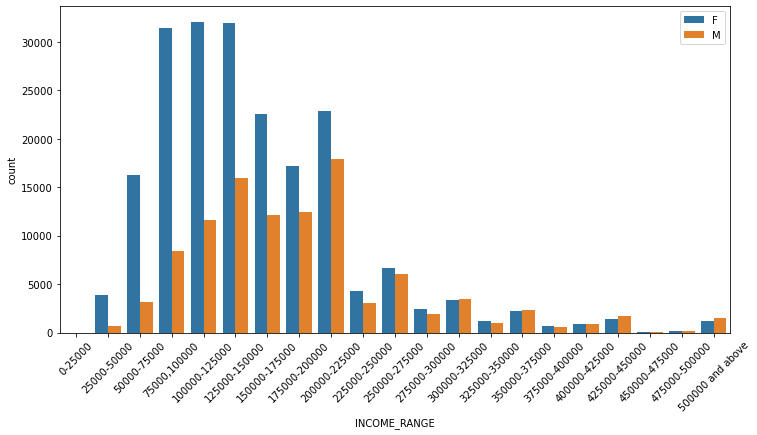

In [83]:
# COUNT PLOT 'INCOME_RANGE' WITH 'CODE_GENDER':
plt.figure(figsize=(12,6)) 
sns.countplot(data = application_data_drop, x = 'INCOME_RANGE', hue = 'CODE_GENDER')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

### Overall conclusion from the above analysis is that female tends to be having more income than male

# Now it is time to find the correlations for defaulters by using heatmap plot.

In [84]:
# Setting data frame for target variable:

loan_defaulted = application_data_drop[application_data_drop['TARGET'] == 1]

# looking at the head of first five rows of the newly created data frame:
loan_defaulted.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE,INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,400000-450000,200000-225000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,51.298630,7.200000,18.008219,5.005479,Cooking staff,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,2.0,2.0,900000 and above,100000-125000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,3.238356,2.819178,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,900000 and above,200000-225000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,36.668493,9.854795,0.123288,12.079452,Sales staff,2.0,Self-employed,0.0,0.0,0.0,0.0,0.0,2.0,250000-300000,125000-150000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,67.928767,1000.665753,14.769863,11.504110,NaN,2.0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,"75000,100000"


In [85]:
loan_defaulted.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
count,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24825.000000
mean,277449.167936,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,40.780351,124.896778,12.293499,7.485204
std,102383.123458,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,11.487245,324.118631,9.040138,4.156097
min,100002.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,21.035616,0.000000,0.000000,0.000000
25%,189555.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,31.221918,1.854795,4.578082,3.813699
50%,276291.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,39.128767,3.994521,11.112329,7.663014
75%,366050.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,49.416438,8.986301,18.208219,11.284932
max,456254.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,68.953425,1000.665753,62.816438,17.005479


In [86]:
loan_defaulted.shape

(24825, 30)

In [87]:
# Correlation for defaulted clients:

corr1 = loan_defaulted.corr()
corr1

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
SK_ID_CURR,1.000000,-0.010165,-0.001290,-0.007578,-0.001816,0.001254,-0.005161,-0.006342,0.002539
AMT_INCOME_TOTAL,-0.010165,1.000000,0.038131,0.046421,0.037583,-0.003096,-0.014977,-0.000158,0.004215
AMT_CREDIT,-0.001290,0.038131,1.000000,0.752195,0.983103,0.135316,0.001930,0.025854,0.052329
AMT_ANNUITY,-0.007578,0.046421,0.752195,1.000000,0.752699,0.014303,-0.081207,-0.034279,0.016767
AMT_GOODS_PRICE,-0.001816,0.037583,0.983103,0.752699,1.000000,0.135810,0.006642,0.025679,0.056086
YEARS_BIRTH,0.001254,-0.003096,0.135316,0.014303,0.135810,1.000000,0.582185,0.289114,0.252863
YEARS_EMPLOYED,-0.005161,-0.014977,0.001930,-0.081207,0.006642,0.582185,1.000000,0.192455,0.229090
YEARS_REGISTRATION,-0.006342,-0.000158,0.025854,-0.034279,0.025679,0.289114,0.192455,1.000000,0.096833
YEARS_ID_PUBLISH,0.002539,0.004215,0.052329,0.016767,0.056086,0.252863,0.229090,0.096833,1.000000


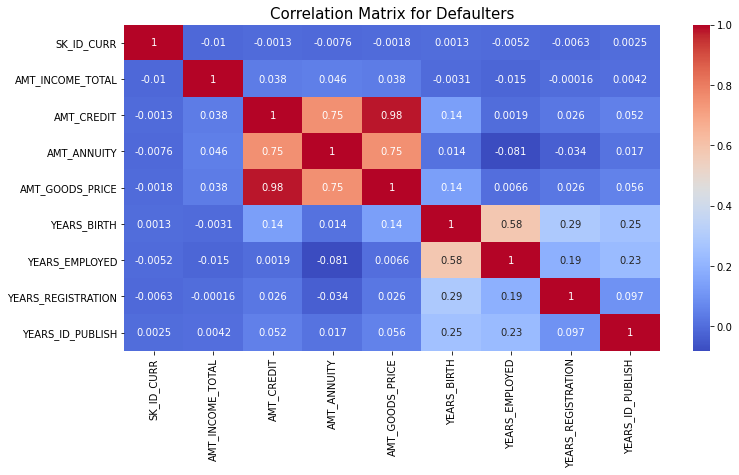

In [88]:
# HEATMAP TO FIND CORRELATION FOR DEFAULTERS IN THE DATA:
plt.figure(figsize=(12,6))
sns.heatmap(loan_defaulted.corr(), annot=True, cmap = "coolwarm")
plt.title('Correlation Matrix for Defaulters', fontsize = 15)
plt.show()

In [89]:
# we need to find top 10 correlations for the defaulters:

corr_2= corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr_2= corr_2.unstack().reset_index().dropna(subset = [0])
corr_2.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_2['Corr_abs'] = abs(corr_2['Correlation_Value'])
corr_2.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_2.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
38,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
39,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
29,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
59,YEARS_EMPLOYED,YEARS_BIRTH,0.582185,0.582185
68,YEARS_REGISTRATION,YEARS_BIRTH,0.289114,0.289114
77,YEARS_ID_PUBLISH,YEARS_BIRTH,0.252863,0.252863
78,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.229090,0.229090
69,YEARS_REGISTRATION,YEARS_EMPLOYED,0.192455,0.192455
49,YEARS_BIRTH,AMT_GOODS_PRICE,0.135810,0.135810
47,YEARS_BIRTH,AMT_CREDIT,0.135316,0.135316


- Here we have listed out top 10 correlation for the defaulters

In [90]:
# setting data frame for target variable:

loan_not_defaulted = application_data_drop[application_data_drop['TARGET'] == 0]

# Displaying the first five rows of the newly created data frame 'Non-defaulters':
loan_not_defaulted.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE,INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0-150000,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,26.939726,6.676712,Laborers,2.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,300000-350000,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,11.810959,9.473973,Core staff,1.0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,500000-550000,100000-125000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,46.413699,4.350685,13.616438,1.306849,Laborers,2.0,Other,0.0,0.0,0.0,0.0,1.0,1.0,450000-500000,"75000,100000"


In [91]:
corr2 = loan_not_defaulted.corr()
corr2

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
SK_ID_CURR,1.000000,0.001739,-0.000342,0.000068,-0.000205,0.001346,0.001744,0.001475,0.000077
AMT_INCOME_TOTAL,0.001739,1.000000,0.342799,0.418953,0.349462,-0.062609,-0.140392,-0.064937,-0.022896
AMT_CREDIT,-0.000342,0.342799,1.000000,0.771309,0.987250,0.047378,-0.070104,-0.013477,0.001464
AMT_ANNUITY,0.000068,0.418953,0.771309,1.000000,0.776686,-0.012263,-0.104978,-0.039436,-0.014113
AMT_GOODS_PRICE,-0.000205,0.349462,0.987250,0.776686,1.000000,0.044565,-0.068609,-0.015916,0.003649
YEARS_BIRTH,0.001346,-0.062609,0.047378,-0.012263,0.044565,1.000000,0.626114,0.333151,0.271314
YEARS_EMPLOYED,0.001744,-0.140392,-0.070104,-0.104978,-0.068609,0.626114,1.000000,0.214511,0.276663
YEARS_REGISTRATION,0.001475,-0.064937,-0.013477,-0.039436,-0.015916,0.333151,0.214511,1.000000,0.100236
YEARS_ID_PUBLISH,0.000077,-0.022896,0.001464,-0.014113,0.003649,0.271314,0.276663,0.100236,1.000000


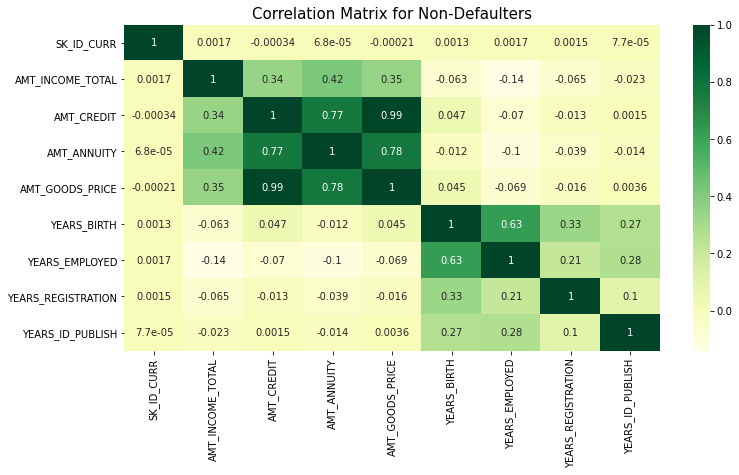

In [92]:
# Plotting HEATMAP to findout ccorrelation for loan non-defaulters.

plt.figure(figsize=(12,6))
sns.heatmap(loan_not_defaulted.corr(), annot=True, cmap = "YlGn")
plt.title('Correlation Matrix for Non-Defaulters', fontsize = 15)
plt.show()

In [93]:
# we need to find top 10 correlations fo the loan non defaulters.

corr_3 = corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(np.bool))
corr_3 = corr_3.unstack().reset_index().dropna(subset = [0])
corr_3.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_3['Corr_abs'] = abs(corr_3['Correlation_Value'])
corr_3.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_3.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
38,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
39,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
29,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
59,YEARS_EMPLOYED,YEARS_BIRTH,0.626114,0.626114
28,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
37,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
19,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
68,YEARS_REGISTRATION,YEARS_BIRTH,0.333151,0.333151
78,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.276663,0.276663
77,YEARS_ID_PUBLISH,YEARS_BIRTH,0.271314,0.271314


# Univariate Analysis for numerical variable

In [94]:
# We are here finding out extreme outlier for the variable 'AMT_ANNUITY'

Q1 = application_data_drop['AMT_ANNUITY'].quantile(0.25)
Q3 = application_data_drop['AMT_ANNUITY'].quantile(0.75)

IQR = Q3 - Q1
extreme_outliers = Q3 + (3 * IQR)
extreme_outliers

88812.0

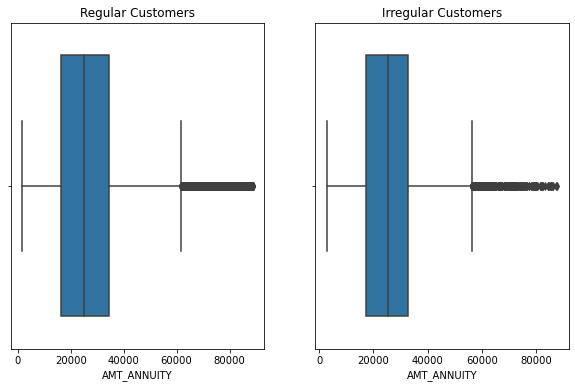

In [95]:
# We have calculated the outlier is greater than 88812 and we shall plot the boxplot for both customers below the outlier.

plt.figure(figsize=(10, 6)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(loan_not_defaulted[loan_not_defaulted['AMT_ANNUITY'] < 88812]['AMT_ANNUITY'])
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(loan_defaulted[loan_defaulted['AMT_ANNUITY'] < 88812]['AMT_ANNUITY'])
plt.title('Irregular Customers')
plt.show()

In [96]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile below the extreme outlier 
# for regular customers.

loan_not_defaulted[loan_not_defaulted['AMT_ANNUITY'] < 88812]['AMT_ANNUITY'].quantile([0.25,0.50,0.75])

0.25    16447.5
0.50    24813.0
0.75    34587.0
Name: AMT_ANNUITY, dtype: float64

In [97]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile below the extreme outlier 
# for irregular customers.

loan_defaulted[loan_defaulted['AMT_ANNUITY'] < 88812]['AMT_ANNUITY'].quantile([0.25,0.50,0.75])

0.25    17350.875
0.50    25222.500
0.75    32895.000
Name: AMT_ANNUITY, dtype: float64

- Observations from the above results are that the major part of the loan annuity of the regular customers lies somewhere between 16450 to 34590 and loan annuity of the irregular customers lies somewhere between 17350 to 32900.

In [98]:
# We are here finding out extreme outlier for the variable 'AMT_GOODS_PRICE'

Q1 = application_data_drop['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application_data_drop['AMT_GOODS_PRICE'].quantile(0.75)

IQR = Q3 - Q1
extreme_outliers = Q3 + (3 * IQR)
extreme_outliers

2002500.0

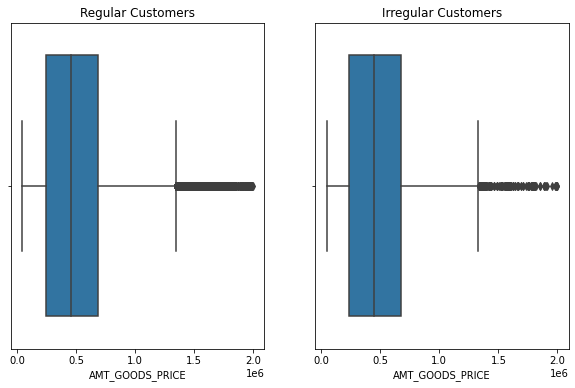

In [99]:
# We have calculated the outlier is greater than 2002500 and we shall plot the boxplot for both customers below the outlier.

plt.figure(figsize=(10, 6)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(loan_not_defaulted[loan_not_defaulted['AMT_GOODS_PRICE'] < 2002500]['AMT_GOODS_PRICE'])
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(loan_defaulted[loan_defaulted['AMT_GOODS_PRICE'] < 2002500]['AMT_GOODS_PRICE'])
plt.title('Irregular Customers')
plt.show()

In [100]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile below the extreme outlier 
# for irregular customers.

loan_defaulted[loan_defaulted['AMT_GOODS_PRICE'] < 2002500]['AMT_GOODS_PRICE'].quantile([0.25,0.50,0.75])

0.25    238500.0
0.50    450000.0
0.75    675000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [101]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile below the extreme outlier 
# for regular customers.

loan_not_defaulted[loan_not_defaulted['AMT_GOODS_PRICE'] < 2002500]['AMT_GOODS_PRICE'].quantile([0.25,0.50,0.75])

0.25    238500.0
0.50    450000.0
0.75    679500.0
Name: AMT_GOODS_PRICE, dtype: float64

- Observation from the above results says that there is absolutely no difference between regular and irregular customers for the amount_goods_price.

In [102]:
# We are here finding out extreme outlier for the variable 'YEARS_EMPLOYED'

Q1 = application_data_drop['YEARS_EMPLOYED'].quantile(0.25)
Q3 = application_data_drop['YEARS_EMPLOYED'].quantile(0.75)

IQR = Q3 - Q1
extreme_outliers = Q3 + (3 * IQR)
extreme_outliers

54.87397260273973

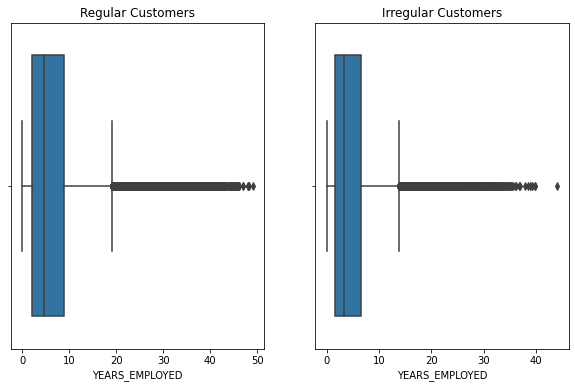

In [103]:
# We have calculated the outlier is greater than 54.87 and we shall plot the boxplot for both customers below the outlier.

plt.figure(figsize=(10, 6)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(loan_not_defaulted[loan_not_defaulted['YEARS_EMPLOYED'] < 54.87]['YEARS_EMPLOYED'])
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(loan_defaulted[loan_defaulted['YEARS_EMPLOYED'] < 54.87]['YEARS_EMPLOYED'])
plt.title('Irregular Customers')
plt.show()

In [104]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile below the extreme outlier 
# for regular customers.

loan_not_defaulted[loan_not_defaulted['YEARS_EMPLOYED'] < 54.87]['YEARS_EMPLOYED'].quantile([0.25,0.50,0.75])

0.25    2.161644
0.50    4.632877
0.75    8.915068
Name: YEARS_EMPLOYED, dtype: float64

In [105]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile below the extreme outlier 
# for irregular customers.

loan_defaulted[loan_defaulted['YEARS_EMPLOYED'] < 54.87]['YEARS_EMPLOYED'].quantile([0.25,0.50,0.75])

0.25    1.627397
0.50    3.369863
0.75    6.521918
Name: YEARS_EMPLOYED, dtype: float64

- It seems to be majority of the regular customers are employed in the current employment are in the range of 2 years to 9 years approximately and irregular customers on the other hand are in the current employment in the range of years from 1.6 to 6.5.

In [106]:
# We are here finding out extreme outlier for the variable 'YEARS_BIRTH'

Q1 = application_data_drop['YEARS_BIRTH'].quantile(0.25)
Q3 = application_data_drop['YEARS_BIRTH'].quantile(0.75)

IQR = Q3 - Q1
extreme_outliers = Q3 + (3 * IQR)
extreme_outliers

113.66849315068492

- Here the outlier can be completely ignored since it dosen't make any sense in the case.

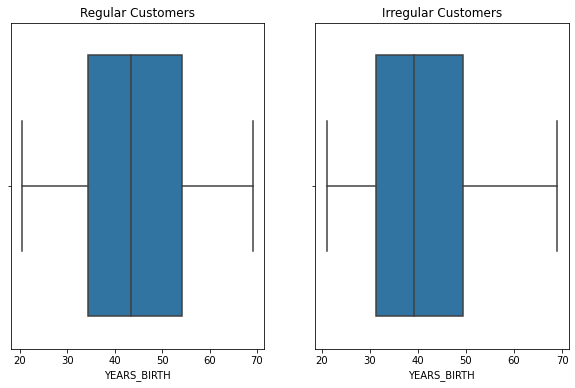

In [107]:
# we shall plot the boxplot for both customers below the outlier.

plt.figure(figsize=(10, 6)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(loan_not_defaulted['YEARS_BIRTH'])
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(loan_defaulted['YEARS_BIRTH'])
plt.title('Irregular Customers')
plt.show()

In [108]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile for irregular customers.

loan_defaulted['YEARS_BIRTH'].quantile([0.25,0.50,0.75])

0.25    31.221918
0.50    39.128767
0.75    49.416438
Name: YEARS_BIRTH, dtype: float64

In [109]:
# Let us look at the quantile of the above variable at 25th, 50th and 75% percentile for regular customers.

loan_not_defaulted['YEARS_BIRTH'].quantile([0.25,0.50,0.75])

0.25    34.345205
0.50    43.498630
0.75    54.229452
Name: YEARS_BIRTH, dtype: float64

- As per the observation the majority of the irregular customers are aged between 31 years to 50 years. Whereas, regular customerss are aged between 34 years to 54 years.

# Bivariate Analysis on numeric data

In [110]:
# We are here finding out extreme outlier for the variable 'AMT_CREDIT'

Q1 = application_data_drop['AMT_CREDIT'].quantile(0.25)
Q3 = application_data_drop['AMT_CREDIT'].quantile(0.75)

IQR = Q3 - Q1
extreme_outliers = Q3 + (3 * IQR)
extreme_outliers

2424600.0

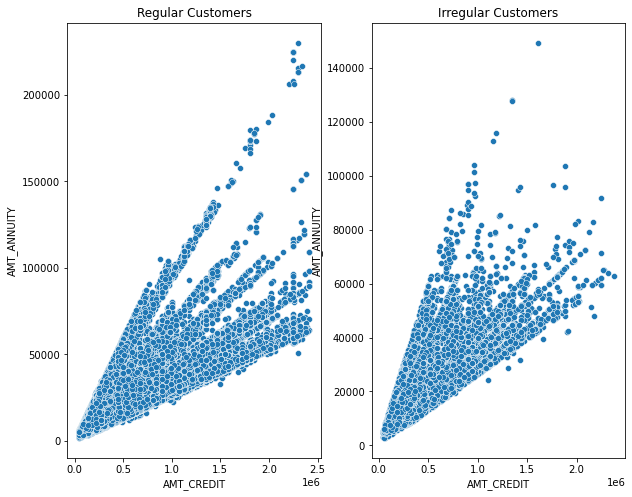

In [111]:
# We have calculated the outlier is greater than 2424600 and we shall plot the scatterplot for both customers below the outlier.
# AMT_CREDIT & AMT_ANNUITY

plt.figure(figsize=(10, 8)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.scatterplot(data = loan_not_defaulted[loan_not_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_ANNUITY')
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.scatterplot(data = loan_defaulted[loan_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_ANNUITY')
plt.title('Irregular Customers')
plt.show()

- Regular customers are likely higher than irregular customers

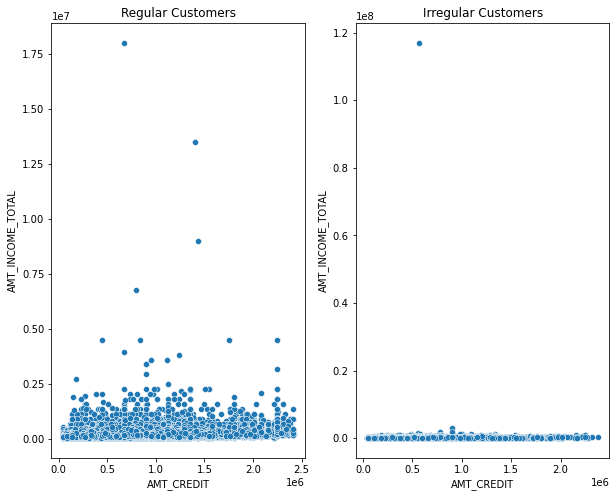

In [112]:
# We have calculated the outlier is greater than 2424600 and we shall plot the scatterplot for both customers below the outlier.
# AMT_CREDIT & AMT_INCOME_TOTAL

plt.figure(figsize=(10, 8)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.scatterplot(data = loan_not_defaulted[loan_not_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL')
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.scatterplot(data = loan_defaulted[loan_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL')
plt.title('Irregular Customers')
plt.show()

-  Naturally irregular customers seems to have lesser income than regular customers.

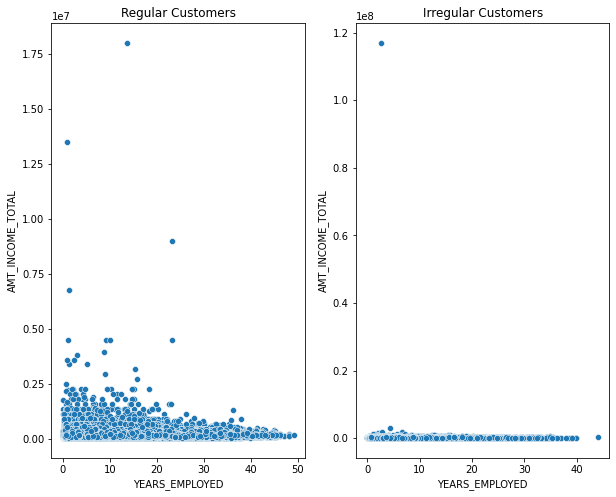

In [113]:
# We have calculated the outlier is greater than 54.87 and we shall plot the scatterplot for both customers below the outlier.
# YEARS_EMPLOYED & AMT_INCOME_TOTAL

plt.figure(figsize=(10, 8)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.scatterplot(data = loan_not_defaulted[loan_not_defaulted['YEARS_EMPLOYED'] < 54.87], x = 'YEARS_EMPLOYED', y = 'AMT_INCOME_TOTAL')
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.scatterplot(data = loan_defaulted[loan_defaulted['YEARS_EMPLOYED'] < 54.87], x = 'YEARS_EMPLOYED', y = 'AMT_INCOME_TOTAL')
plt.title('Irregular Customers')
plt.show()

- The regular customers tend to be stablely employed and obviously with a good income.

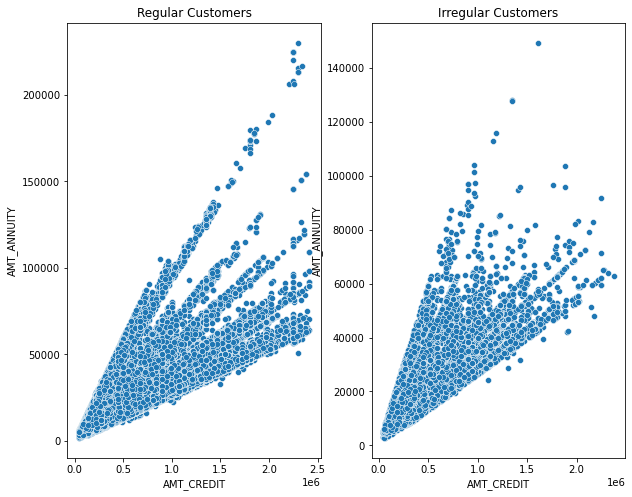

In [114]:
# We have calculated the outlier is greater than 2424600 and we shall plot the scatterplot for both customers below the outlier.
# AMT_CREDIT & AMT_ANNUITY

plt.figure(figsize=(10, 8)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.scatterplot(data = loan_not_defaulted[loan_not_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_ANNUITY')
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.scatterplot(data = loan_defaulted[loan_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_ANNUITY')
plt.title('Irregular Customers')
plt.show()

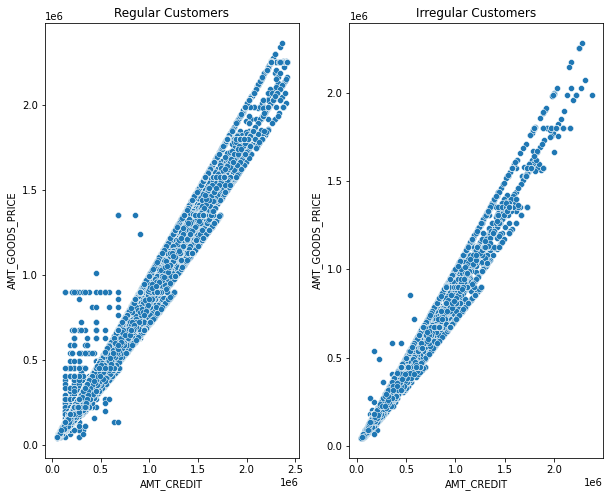

In [115]:
# We have calculated the outlier is greater than 2424600 and we shall plot the scatterplot for both customers below the outlier.
# AMT_CREDIT & AMT_GOODS_PRICE

plt.figure(figsize=(10, 8)) 

# non-defaulter clients:
plt.subplot(1,2,1)
sns.scatterplot(data = loan_not_defaulted[loan_not_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE')
plt.title('Regular Customers')

# defaulter clients:
plt.subplot(1,2,2)
sns.scatterplot(data = loan_defaulted[loan_defaulted['AMT_CREDIT'] < 2424600], x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE')
plt.title('Irregular Customers')
plt.show()

# Bivariate Analysis for categorical data

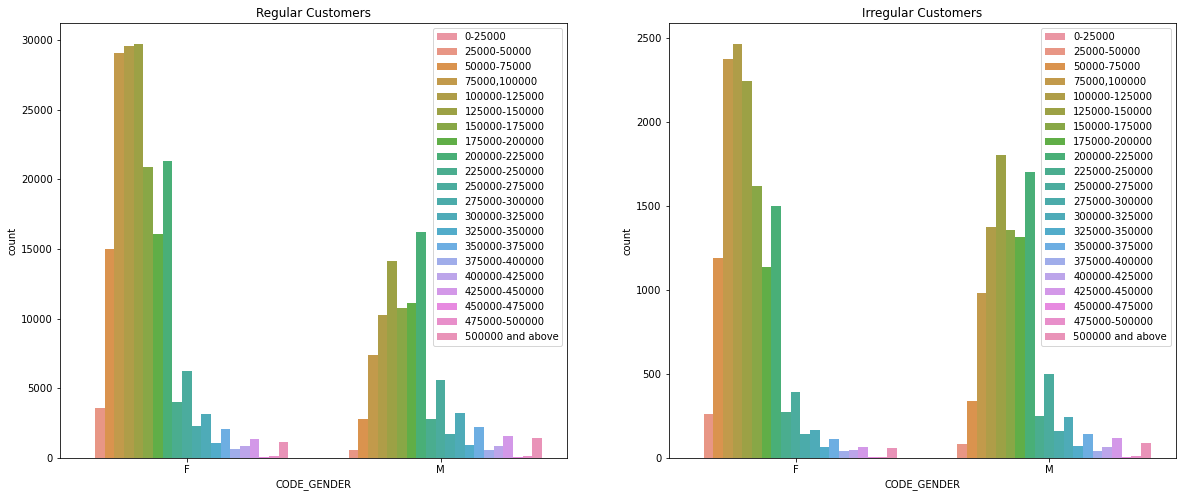

In [116]:
# Plotting 'CODE_GENDER' & 'INCOME_RANGE':

plt.figure(figsize=(20,8)) 

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.countplot(data = loan_not_defaulted, x = 'CODE_GENDER', hue = 'INCOME_RANGE')
plt.title('Regular Customers')
plt.legend(loc='upper right')

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.countplot(data = loan_defaulted, x = 'CODE_GENDER', hue = 'INCOME_RANGE')
plt.title('Irregular Customers')

plt.legend()
plt.show()

- As it is , even the plot here says females are having higher income range.

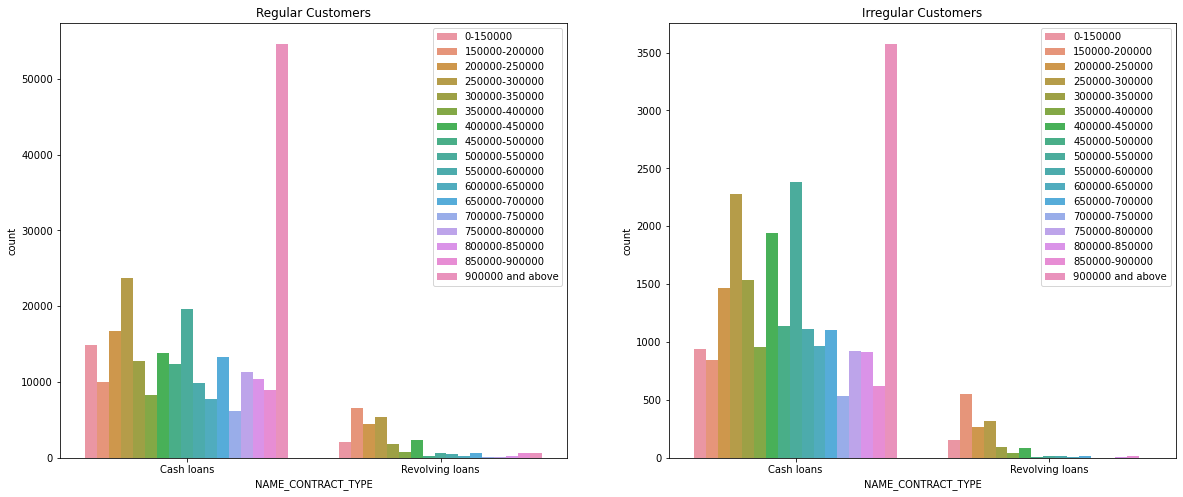

In [117]:
# Plotting 'NAME_CONTRACT_TYPE' & 'CREDIT_RANGE':

plt.figure(figsize=(20,8)) 

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.countplot(data = loan_not_defaulted, x = 'NAME_CONTRACT_TYPE', hue = 'CREDIT_RANGE')
plt.title('Regular Customers')
plt.legend(loc='upper right')

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.countplot(data = loan_defaulted, x = 'NAME_CONTRACT_TYPE', hue = 'CREDIT_RANGE')
plt.title('Irregular Customers')

plt.legend()
plt.show()

- As previous analysis , we can infer that cash loans are much higher than revolving loans for the credit range.

# Bivariate Analysis for both numerical and categorical data.

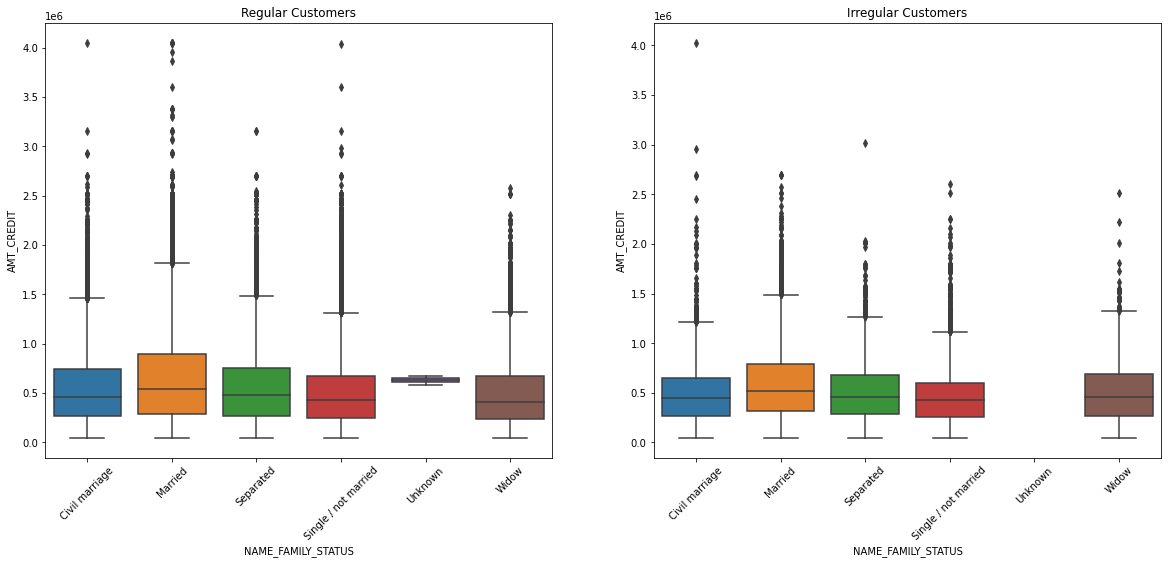

In [118]:
# Plotting 'AMT_CREDIT' v/s 'NAME_FAMILY_STATUS':

plt.figure(figsize=(20,8)) 

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(data = loan_not_defaulted, y = 'AMT_CREDIT', x = 'NAME_FAMILY_STATUS')
plt.title('Regular Customers')
plt.xticks(rotation = 45)

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(data = loan_defaulted, y = 'AMT_CREDIT', x = 'NAME_FAMILY_STATUS')
plt.title('Irregular Customers')
plt.xticks(rotation = 45)

plt.show()

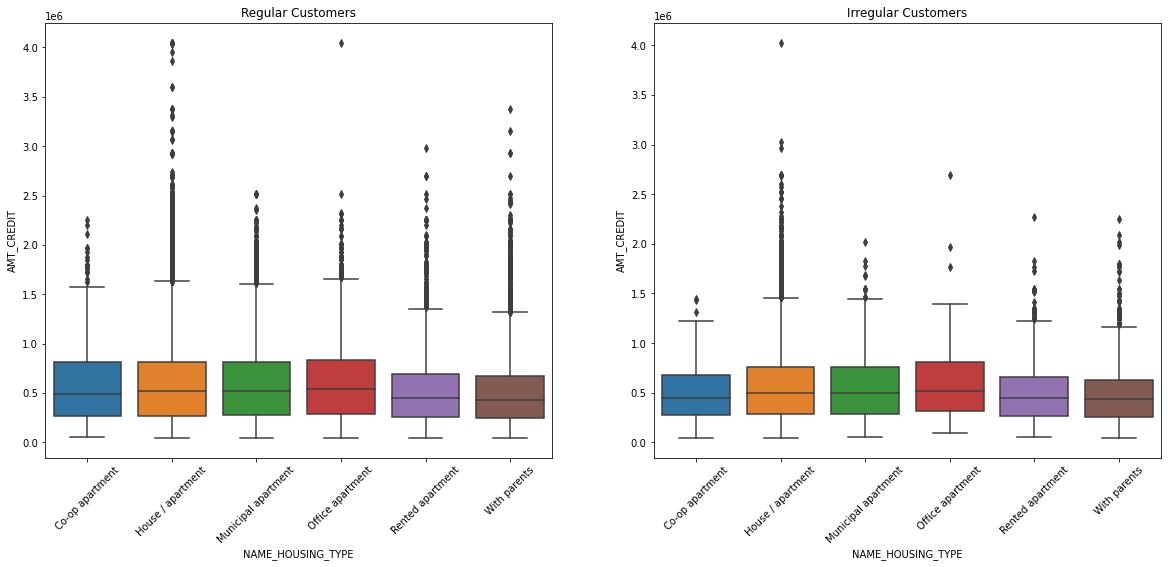

In [119]:
# Plotting 'AMT_CREDIT' v/s 'NAME_HOUSING_TYPE':

plt.figure(figsize=(20,8)) 

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(data = loan_not_defaulted, y = 'AMT_CREDIT', x = 'NAME_HOUSING_TYPE')
plt.title('Regular Customers')
plt.xticks(rotation = 45)

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(data = loan_defaulted, y = 'AMT_CREDIT', x = 'NAME_HOUSING_TYPE')
plt.title('Irregular Customers')
plt.xticks(rotation = 45)

plt.show()

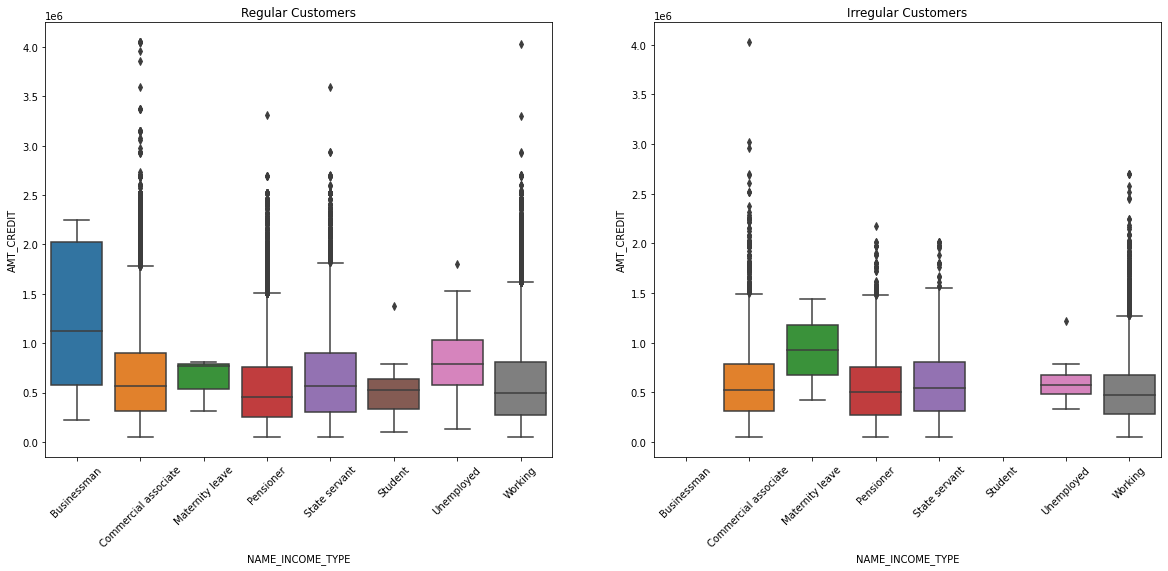

In [120]:
# Plotting 'AMT_CREDIT' v/s 'NAME_INCOME_TYPE':

plt.figure(figsize=(20,8)) 

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(data = loan_not_defaulted, y = 'AMT_CREDIT', x = 'NAME_INCOME_TYPE')
plt.title('Regular Customers')
plt.xticks(rotation = 45)

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(data = loan_defaulted, y = 'AMT_CREDIT', x = 'NAME_INCOME_TYPE')
plt.title('Irregular Customers')
plt.xticks(rotation = 45)

plt.show()

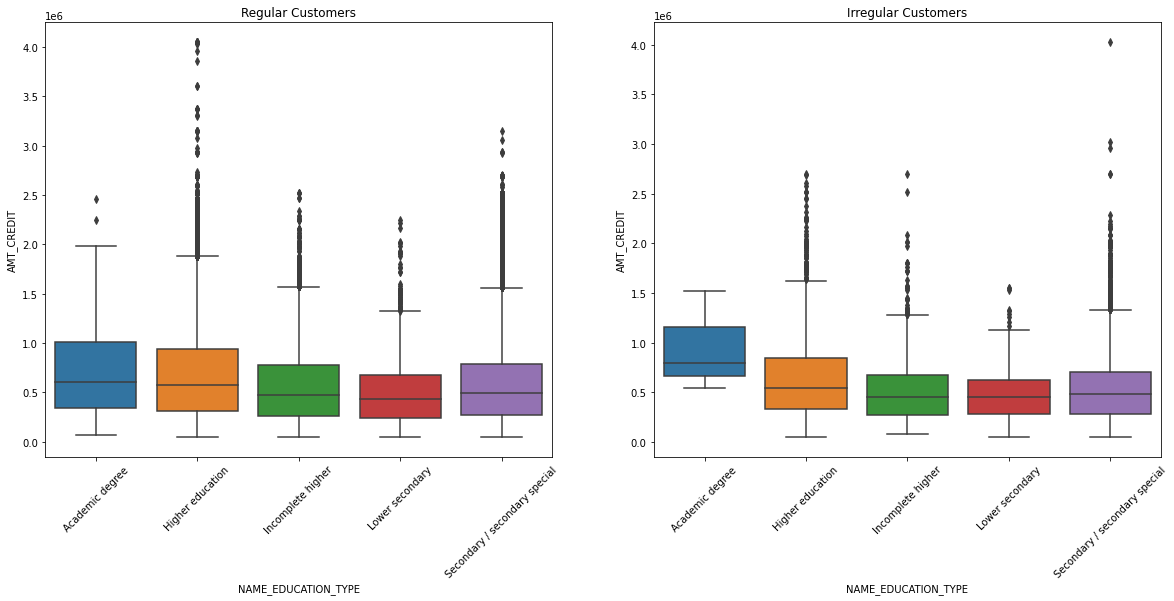

In [121]:
# Plotting 'AMT_CREDIT' v/s 'NAME_EDUCATION_TYPE':

plt.figure(figsize=(20,8)) 

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.boxplot(data = loan_not_defaulted, y = 'AMT_CREDIT', x = 'NAME_EDUCATION_TYPE')
plt.title('Regular Customers')
plt.xticks(rotation = 45)

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(data = loan_defaulted, y = 'AMT_CREDIT', x = 'NAME_EDUCATION_TYPE')
plt.title('Irregular Customers')
plt.xticks(rotation = 45)

plt.show()

# Loading previous_application.csv or previous data application

In [122]:
# Loading data in notebook
df=pd.read_csv("G:\\PG CERTIFICATION IN DATA SCIENCE-UPGRAD\\FEB 2021\\23.FEB.2021\\EDA\\previous_application.csv")
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# checking last 5 rows 
df.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [124]:
# Checking the data shape 
df.shape

(1670214, 37)

- the data set has 1670214 rows and 37 columns

In [125]:
# Checking info of the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [126]:
# Describe the dataset
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [127]:
#Checking null values in the column

df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [128]:
#Calculating the null values percentage

(100*df.isnull().sum()/len(df)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

- dropped all the column which is having more than 40% null values because those value will impact on our analysis if we impute data on those values our analysis will get impacted due to this imputation


In [129]:
#Removing columns which is having null values 
df_d = df.loc[:, df.isnull().mean() <= 0.40]
df_d.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [130]:
# Cheking the null values after dropped more than 40% null values column
(100*df_d.isnull().sum()/len(df_d)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

In [131]:
#after removing null values checking shape of the dataset
df_d.shape

(1670214, 26)

- After dropping the columns having null values more than 40% we are now havinb 26 columns.

In [132]:
#after removing null values checking null values of the dataset
df_d.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

### AMT_CREDIT column is having null values need to replace all the null values by there mean value


In [133]:
#checking the row of null value in AMT_CREDIT column
df_d[df_d.AMT_CREDIT.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,NaN,FRIDAY,10,Y,1,XAP,Approved,-608,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street


In [134]:
#trying to fill it by mean of the column 
df_mean=df_d.AMT_CREDIT.mean()

In [135]:
df_mean

196114.02121797804

In [136]:
#Filling the missing value with mean of the column

df_d['AMT_CREDIT'].fillna(df_mean,inplace=True)

In [137]:
df_d[df_d.AMT_CREDIT.isnull()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION


- we have made sure that there are no null values in the 'AMT_CREDIT' variable.

In [138]:
# Checking the null values in the dataset
df_d.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [139]:
# Value count of PRODUCT_COMBINATION column 
df_d['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [140]:
# Taking mood of PRODUCT_COMBINATION column and fill it with mode values
df_mode=df_d['PRODUCT_COMBINATION'].mode
df_d['PRODUCT_COMBINATION'].fillna(df_mode,inplace=True)

In [141]:
# Checking the null values filled or not
df_d['PRODUCT_COMBINATION'].isnull().sum()

0

In [142]:
# calculating null values percentage in each column
(100*df_d.isnull().sum()/len(df_d)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.00
dtype: float64

In [143]:
# Checking the data type of AMT_ANNUITY column
df_d['AMT_ANNUITY'].dtype

dtype('float64')

- Here we are taking mean of AMT_ANNUITY column and fill the NAN values with it


In [144]:
AMT_ANNUITY_mean=df_d['AMT_ANNUITY'].mean()

In [145]:
df_d['AMT_ANNUITY'].value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
30073.860        1
41845.365        1
36622.620        1
41864.760        1
63715.905        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [146]:
#Filling null values by mean of the column
df_d['AMT_ANNUITY'].fillna(AMT_ANNUITY_mean,inplace=True)

In [147]:
#Checking the null values in the column
df_d['AMT_ANNUITY'].isnull().sum()

0

In [148]:
#"AMT_GOODS_PRICE" column having null values

df_d['AMT_GOODS_PRICE'].isnull().sum()

385515

- By taking the mean value of AMT_GOODS_PRICE column and fill the NAN value with it

In [149]:
#taking mean value of AMT_GOODS_PRICE column
AMT_GOODS_PRICE_mean=df_d['AMT_GOODS_PRICE'].mean()
# Fill up the NAN values with there mean
df_d['AMT_GOODS_PRICE'].fillna(AMT_GOODS_PRICE_mean,inplace=True)
df_d['AMT_GOODS_PRICE'].isnull().sum()

0

In [150]:
# Checking the null values
df_d['CNT_PAYMENT'].isnull().sum()

372230

- By filling the numeric values with the column mean and if there is any column data type is chatagorical then we have to use mode as per the data type .

In [151]:
#taking mean of the CNT_PAYMENT column
CNT_PAYMENT_mean=df_d['CNT_PAYMENT'].mean()

#we are filling data by the mean of that column
df_d['CNT_PAYMENT'].fillna(CNT_PAYMENT_mean,inplace=True)
df_d['CNT_PAYMENT'].isnull().sum()

0

In [152]:
# checking the null value again to sure that our null value get removed
(100*df_d.isnull().sum()/len(df_d)).round(2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

- Here we are finding the percentage value of NAME_CONTRACT_STATUS column

In [153]:
# we will check the percentages of each type of contract status
df_d['NAME_CONTRACT_STATUS'].value_counts()*100/len(df_d)

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

- Here we are showing our distribution of contract status and check the loan status is how much dependent on other columns in the below we will show and discuss about the every column dependency based on the contract status

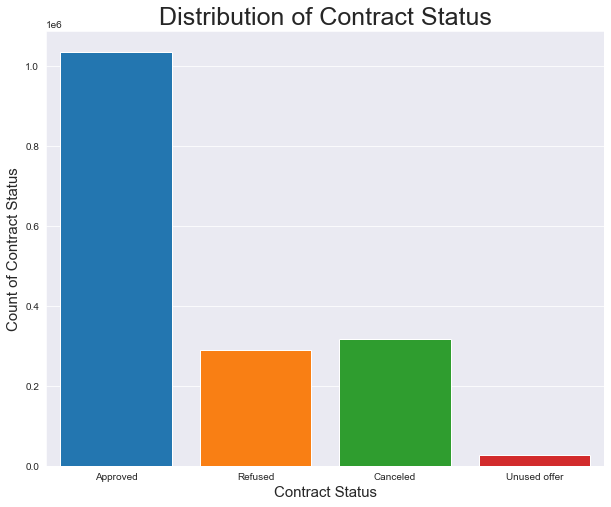

In [154]:
# Ploting NAME_CONTRACT_STATUS in a better visualization 

sns.set_style('darkgrid')
plt.figure(figsize=[10,8])
sns.countplot(df_d.NAME_CONTRACT_STATUS,saturation=0.95)
plt.xlabel("Contract Status" , fontsize=15)
plt.ylabel("Count of Contract Status", fontsize=15)
plt.title("Distribution of Contract Status", fontsize=25)
plt.show()

- Here, we are dividing our dataset into 4 subset as act like a target variable we can use this to get an idea of all the rest column is how much dependent on NAME_CONTRACT_STATUS .

In [155]:
# we nare dividing the dataset into four part and want to compare with contract Type

approved_df = df_d[df_d['NAME_CONTRACT_STATUS']=='Approved']
refused_df = df_d[df_d['NAME_CONTRACT_STATUS']=='Refused']
canceled_df = df_d[df_d['NAME_CONTRACT_STATUS']=='Canceled']
unused_df = df_d[df_d['NAME_CONTRACT_STATUS']=='Unused offer']

- Based on the below plot its clear that Consumer loans has more rejection in the opposite hand Cash loans has more approval

In [156]:
# value count in the NAME_CONTRACT_TYPE column
df_d['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

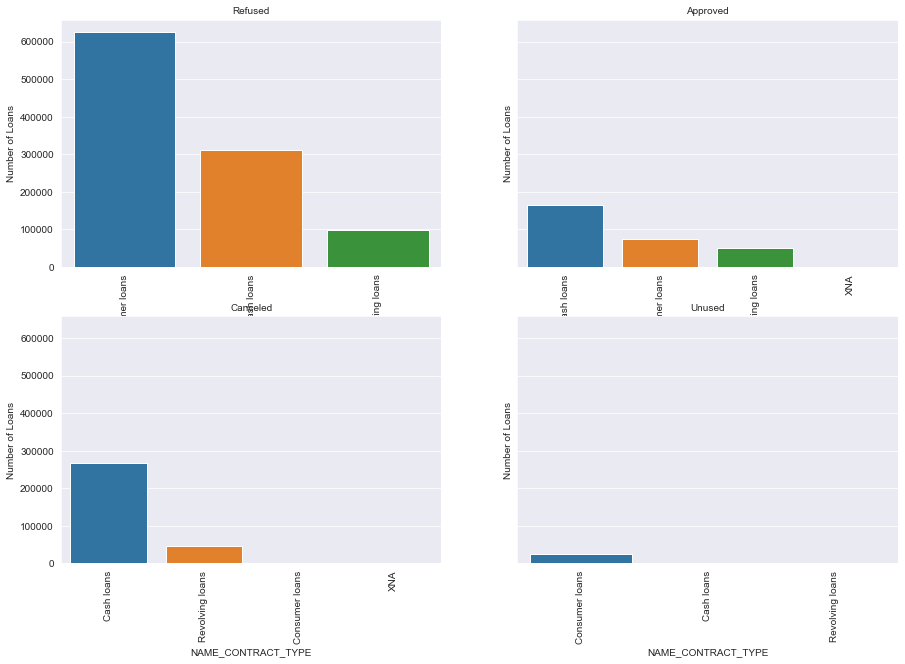

In [157]:
# Creating a Function to use this in further when we will compare different different column 

def seaborns_plot(NAME_CONTRACT_TYPE) :

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(15,10),sharey=True)
    ax1 = sns.countplot(ax=ax1,data=approved_df,x=NAME_CONTRACT_TYPE)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('NAME_CONTRACT_TYPE')
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    
    ax2 = sns.countplot(ax=ax2,data=refused_df,x=NAME_CONTRACT_TYPE)
    ax2.set_title("Approved", fontsize=10)
    ax2.set_xlabel('NAME_CONTRACT_TYPE')
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

    ax3 = sns.countplot(ax=ax3,data=canceled_df,x=NAME_CONTRACT_TYPE)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('NAME_CONTRACT_TYPE')
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
    
    ax4 = sns.countplot(ax=ax4,data=unused_df,x=NAME_CONTRACT_TYPE)
    ax4.set_title("Unused", fontsize=10)
    ax4.set_xlabel('NAME_CONTRACT_TYPE')
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)
seaborns_plot('NAME_CONTRACT_TYPE')
plt.show()

- Cash through the bank is having more Approval and rejection ratio

In [158]:
# Finding unique value in NAME_PAYMENT_TYPE column
df_d['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

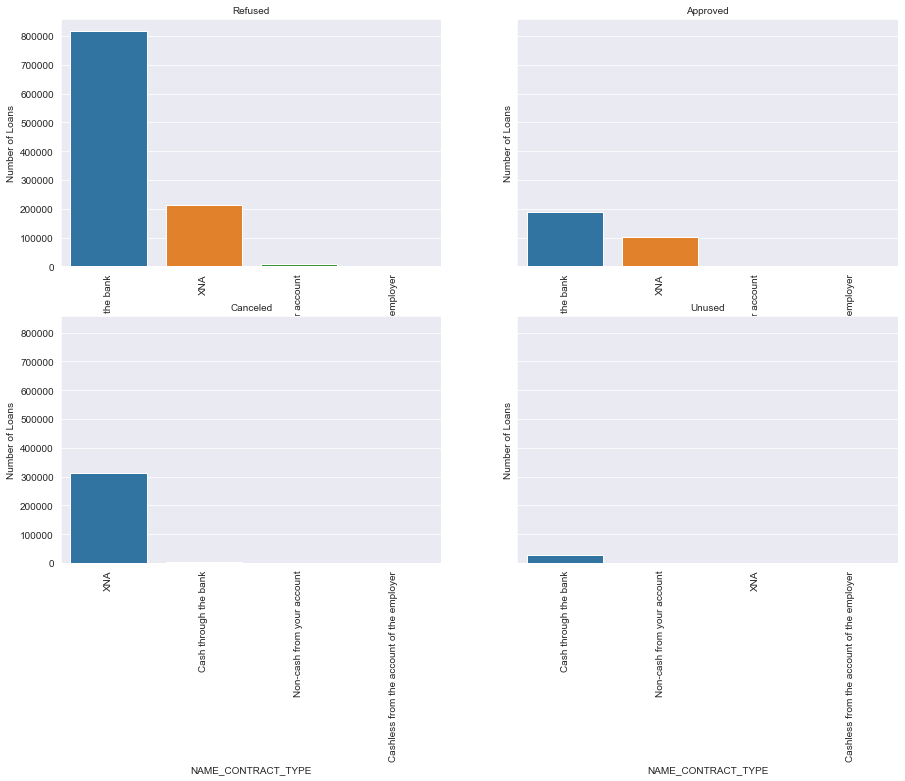

In [159]:
# Based on Payment type we can check which one is approving rate more and less
seaborns_plot('NAME_PAYMENT_TYPE')
plt.show()

In [160]:
# Finding the unique values in NAME_CLIENT_TYPE column
df_d['NAME_CLIENT_TYPE'].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

- Based on the rejection as well as approval Repeater stands in top possition 

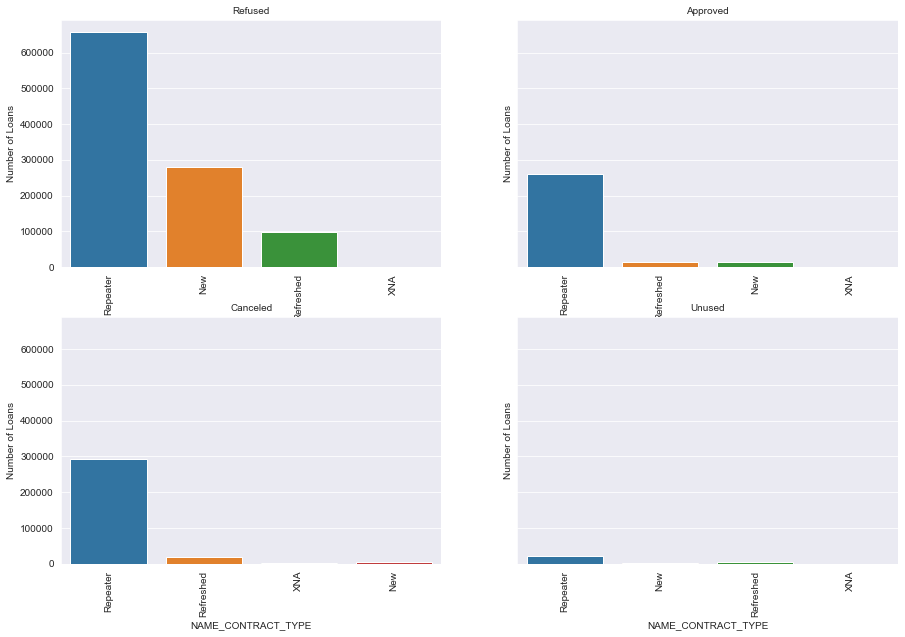

In [161]:
# Based on client type we can check which one is approving rate more and less
seaborns_plot('NAME_CLIENT_TYPE')
plt.show()

In [162]:
# Value count of NAME_GOODS_CATEGORY column 
df_d['NAME_GOODS_CATEGORY'].value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

- Here we can tell that more rejection and approval done by mobile

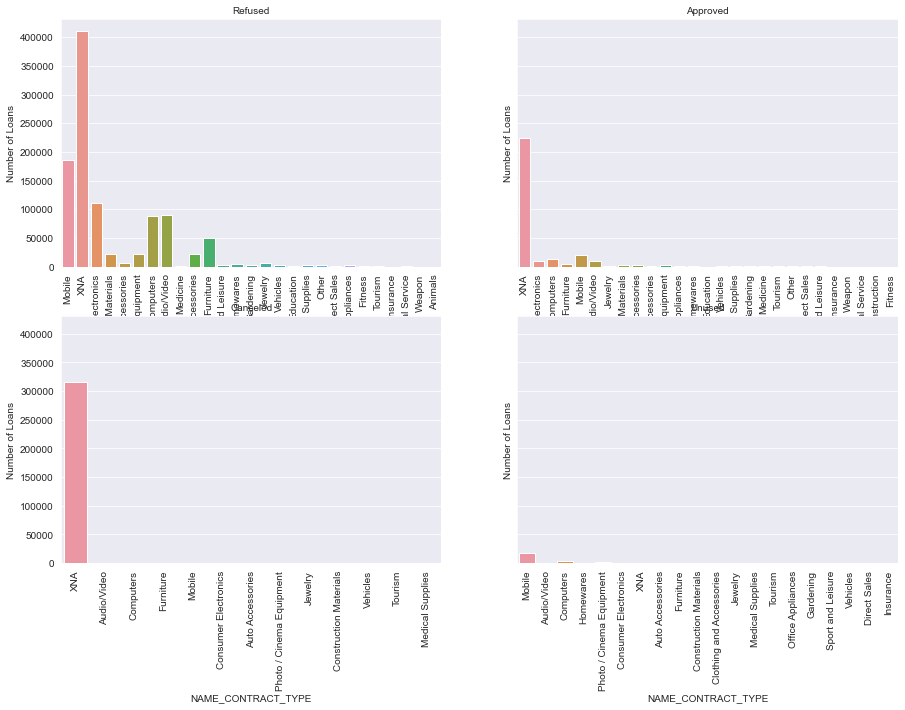

In [163]:
# count_plot for NAME_GOODS_CATEGORY column
seaborns_plot('NAME_GOODS_CATEGORY')
plt.show()

In [164]:
# Findind unique value of Name Portfolio column
df_d['NAME_PORTFOLIO'].value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

- Here we are comparing portfolio to our contact status and we can uderstand from the plot most of the approvement done by case and refused by POS

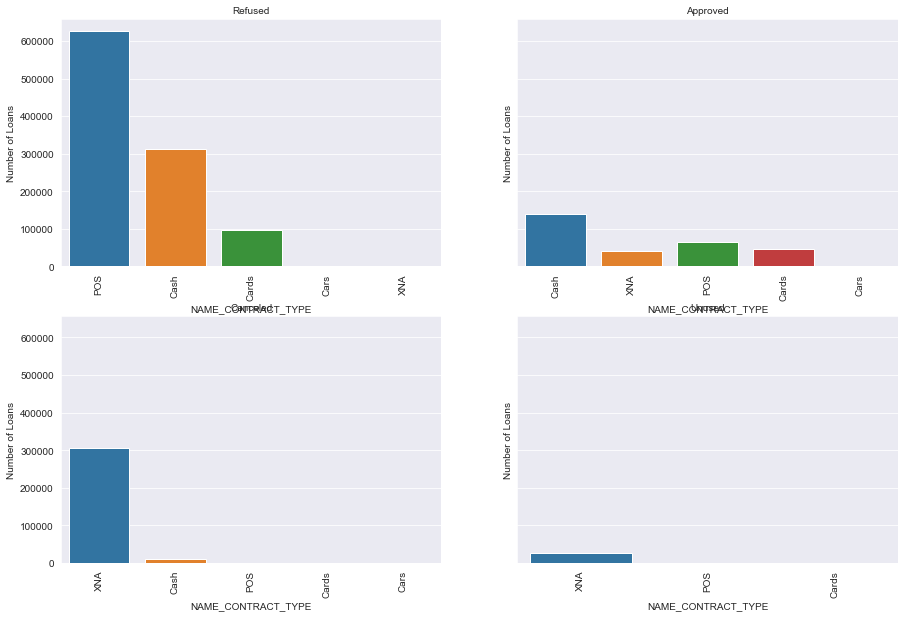

In [165]:
# Count_plot of NAME_PORTFOLIO COLUMN based on CONTRACT STATUS
seaborns_plot('NAME_PORTFOLIO')
plt.show()

In [166]:
# Finding value count in this column
df_d['NAME_SELLER_INDUSTRY'].value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

- Here XNA is there, so if we ignore this then we can tell that Consumer electronics has more approval as well as more rejection

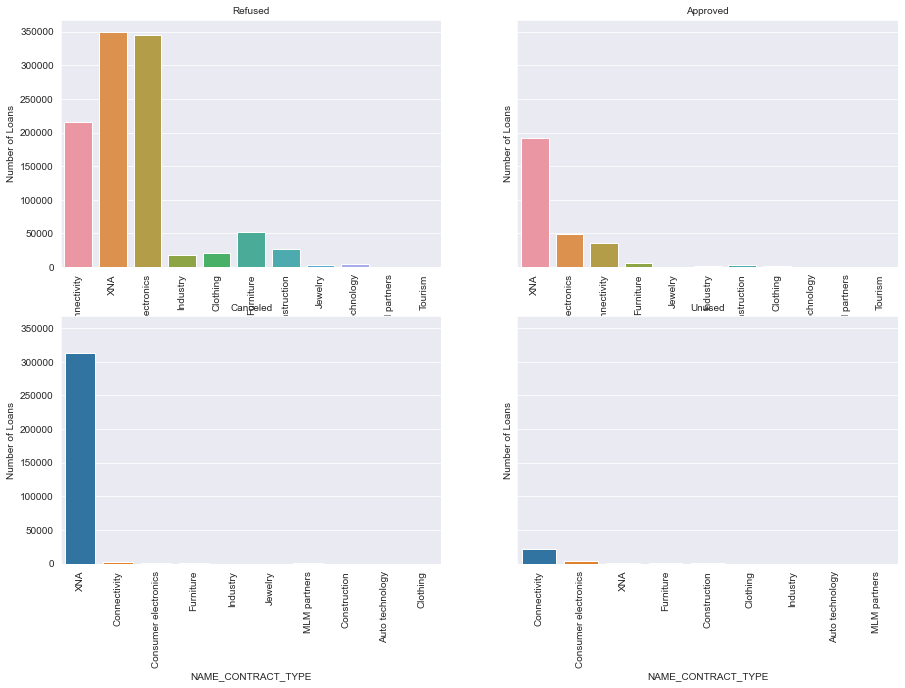

In [167]:
# Checking the approval and rejection based on NAME_SELLER_INDUSTRY effects
seaborns_plot('NAME_SELLER_INDUSTRY')
plt.show()

In [168]:
# finding unique value of this column
df_d['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

- Most appoved case in the below plot is Credit and cash offices and the refuse case is in Country-wide

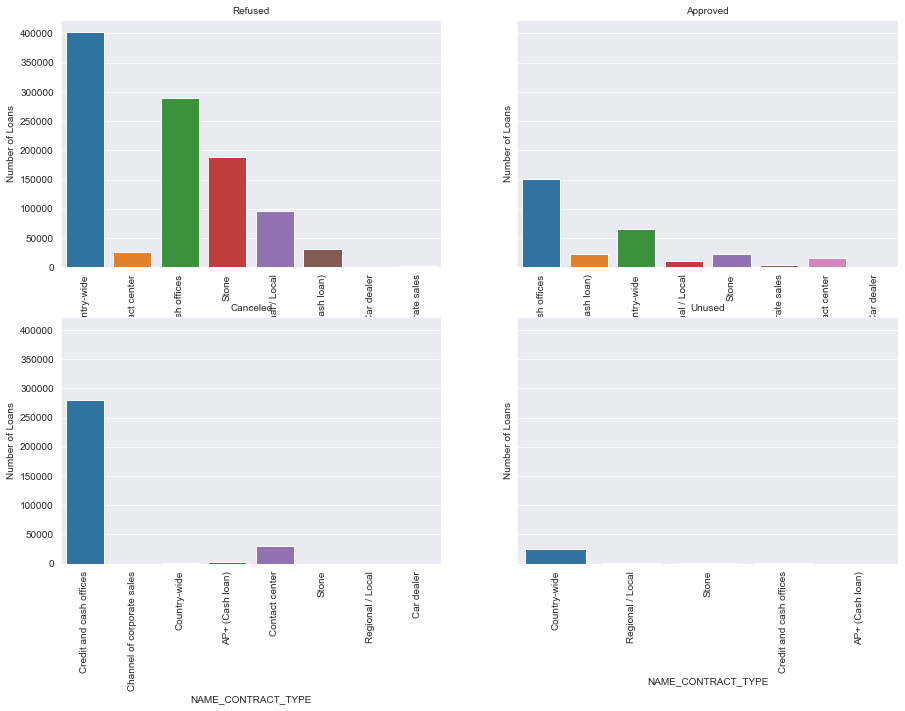

In [169]:
# Ploting a countplot to check in the CHANNEL_TYPE column 
seaborns_plot('CHANNEL_TYPE')
plt.show()

In [170]:
# Checking the unique values of NAME_YIELD_GROUP column
df_d['NAME_YIELD_GROUP'].value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

- From the below plot we can tell that middle has high rejection and low normal is more accpeted after XNA

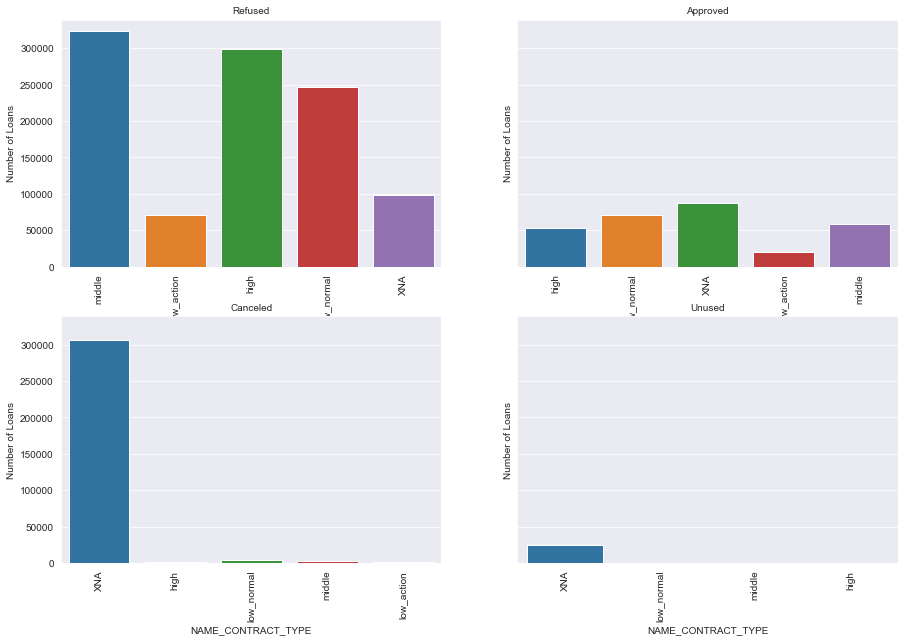

In [171]:
# plot for NAME_YIELD_GROUP column based on the contact type 

seaborns_plot('NAME_YIELD_GROUP')
plt.show()

In [172]:
# Finding unique value in NAME_PRODUCT_TYPE column
df_d['NAME_PRODUCT_TYPE'].value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

- More Approval case is x-sell and rejection in XNA

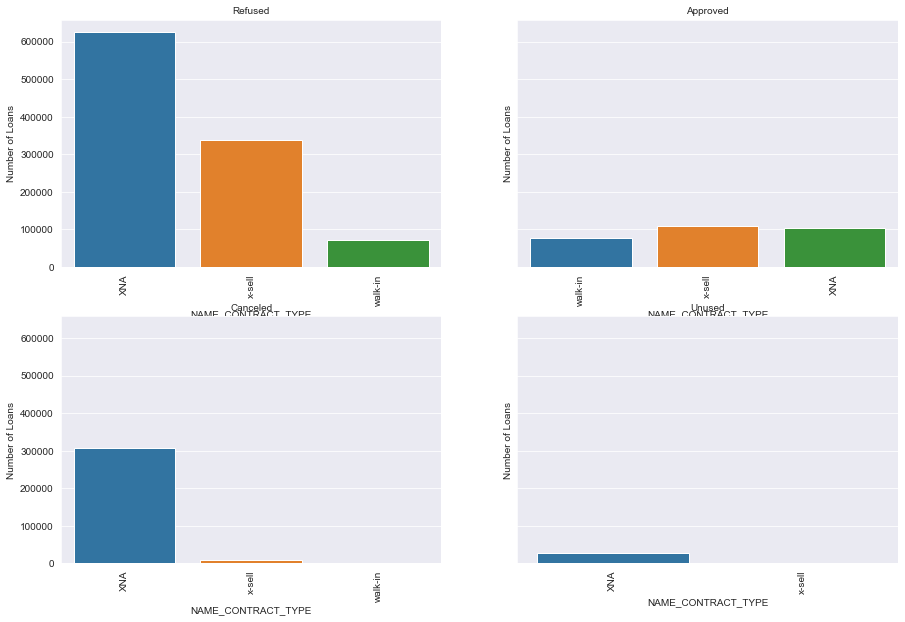

In [173]:
# Countplot of a product type column based on the contact type
seaborns_plot('NAME_PRODUCT_TYPE')
plt.show()

In [174]:
# counting unique value in code_rejection_reason column
df_d['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

- we can check the reason of rejection is XAP and except by HC

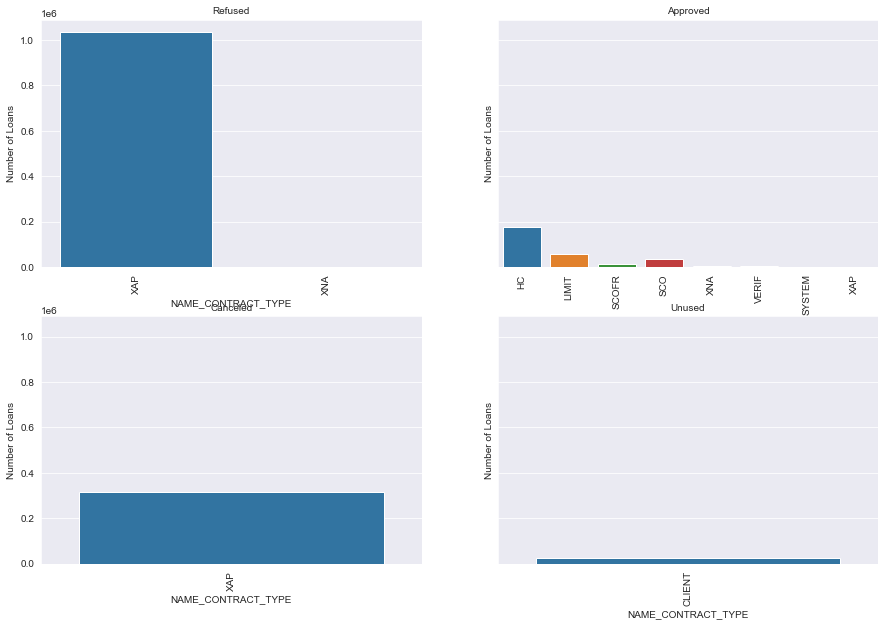

In [175]:
# Ploting a countplot to measure the rejection reason based on the cotact status 
seaborns_plot('CODE_REJECT_REASON')
plt.show()

In [176]:
# Checking the unique value of NAME_CASH_LOAN_PURPOSE column
df_d['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

- In this below plot we can tell that XAP has more rejection and approvation based on the contact type

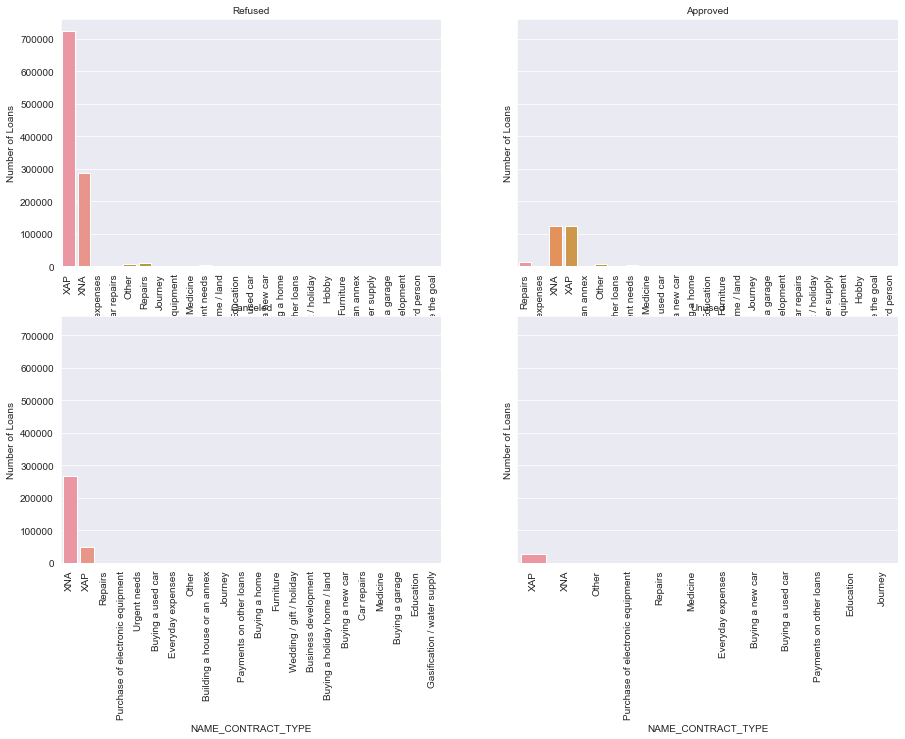

In [177]:
seaborns_plot('NAME_CASH_LOAN_PURPOSE')
plt.show()

## Outliers

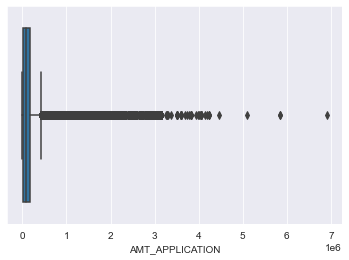

In [178]:
# 'AMT_APPLICATION'

sns.boxplot(df_d['AMT_APPLICATION'])
plt.show()

In [179]:
#Checking extreme outliers:
Q1 = df_d['AMT_APPLICATION'].quantile(0.25)
Q3 = df_d['AMT_APPLICATION'].quantile(0.75)
IQR = Q3 - Q1
extreme_outliers = Q3 + (3 * IQR)
extreme_outliers

665280.0

In [180]:
# treating outliers

Outlier_AMT = (df_d['AMT_APPLICATION'] <= 665280)
Outlier_AMT_APPL = df_d['AMT_APPLICATION'][Outlier_AMT]
Outlier_AMT_APPL.value_counts()

0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
134814.15         1
346261.50         1
346257.00         1
346239.00         1
432405.00         1
Name: AMT_APPLICATION, Length: 91573, dtype: int64

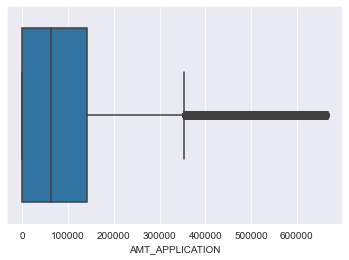

In [181]:
sns.boxplot(Outlier_AMT_APPL)
plt.show()

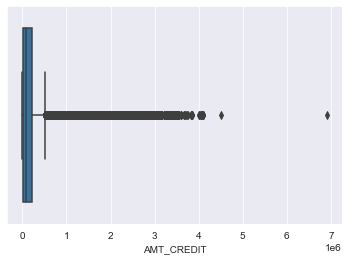

In [182]:
# 'AMT_CREDIT' 

sns.boxplot(df_d['AMT_CREDIT'])
plt.show()

In [183]:
#Checking extreme outliers:
Q1 = df_d['AMT_CREDIT'].quantile(0.25)
Q3 = df_d['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
extreme_outliers = Q3 + (3 * IQR)
extreme_outliers

793192.5

In [184]:
# treating outliers

Outlier_AMT = (df_d['AMT_CREDIT'] <= 793192.5)
Outlier_AMT_APPL = df_d['AMT_CREDIT'][Outlier_AMT]
Outlier_AMT_APPL.value_counts()

0.0         336768
45000.0      35051
225000.0     21094
450000.0     19954
135000.0     18720
             ...  
317727.0         1
317686.5         1
317682.0         1
317673.0         1
381105.0         1
Name: AMT_CREDIT, Length: 80939, dtype: int64

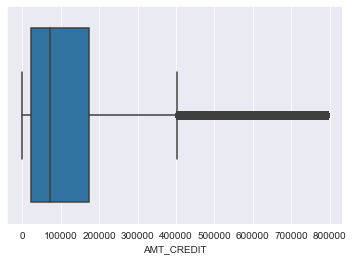

In [185]:
sns.boxplot(Outlier_AMT_APPL)
plt.show()

# Merging dataframes previous_application.csv & application_data.csv

In [186]:
merged_data = pd.merge(left = application_data_drop, right = df_d, how = 'inner', on = 'SK_ID_CURR', suffixes='_x')

# looking at the head of first five rows of the newly created data frame:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_RANGE,INCOME_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,9.994521,5.808219,Laborers,1.0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,400000-450000,200000-225000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,45.931507,3.254795,3.249315,0.797260,Core staff,2.0,School,0.0,0.0,0.0,0.0,0.0,0.0,900000 and above,250000-275000,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,11.671233,6.934247,Laborers,1.0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0-150000,50000-75000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [187]:
merged_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  category
 2   NAME_CONTRACT_TYPE_          1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  category
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_                  1413701 non-null  float64 
 9   AMT_ANNUITY_                 1413608 non-null  float64 
 10  AMT_GOODS_PRICE_             1412493 non-null  float64 
 11  NAME_INCOME_TYPE             1413701 non-null  category
 12  NAME_EDUCATION_TYPE         

In [188]:
merged_data.shape

(1413701, 55)

## Univariate Analysis

In [189]:
merged_data['NAME_CONTRACT_STATUS'].value_counts(normalize = True)

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64

In [190]:
merged_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

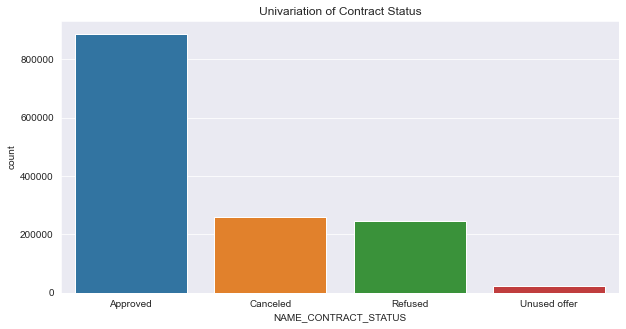

In [191]:
plt.figure(figsize=(10,5))

sns.countplot(merged_data['NAME_CONTRACT_STATUS'])
plt.title("Univariation of Contract Status")
plt.show()

In [192]:
# Assuming NAME_CONTRACT_STATUS as a target variable in data frame 'merged_data' based on the 4 types of contract status:

approved = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Approved']
refused = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Refused']
canceled = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Canceled']
unused = merged_data[merged_data['NAME_CONTRACT_STATUS']=='Unused offer']

In [193]:
merged_data['NAME_CONTRACT_TYPEx'].value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPEx, dtype: int64

## Bivariate Analysis

In [194]:
# NAME_CONTRACT_TYPEx:
def combined_plot(variable):
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10), sharey = True)
    ax1 = sns.countplot(ax = ax1, data = approved, x = variable)
    ax1.set_title("Approved", fontsize = 12, fontweight = 'bold')
    ax1.set_ylabel("Number of Loans")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    ax2 = sns.countplot(ax = ax2, data = refused, x = variable)
    ax2.set_title("Refused", fontsize = 12, fontweight = 'bold')
    ax2.set_ylabel("Number of Loans")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
    
    ax3 = sns.countplot(ax = ax3, data = canceled, x = variable)
    ax3.set_title("Canceled", fontsize = 12, fontweight = 'bold')
    ax3.set_ylabel("Number of Loans")
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 90)
    ax4 = sns.countplot(ax = ax4, data = unused, x = variable)
    ax4.set_title("Unused", fontsize = 12, fontweight = 'bold')
    ax4.set_ylabel("Number of Loans")
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 90)

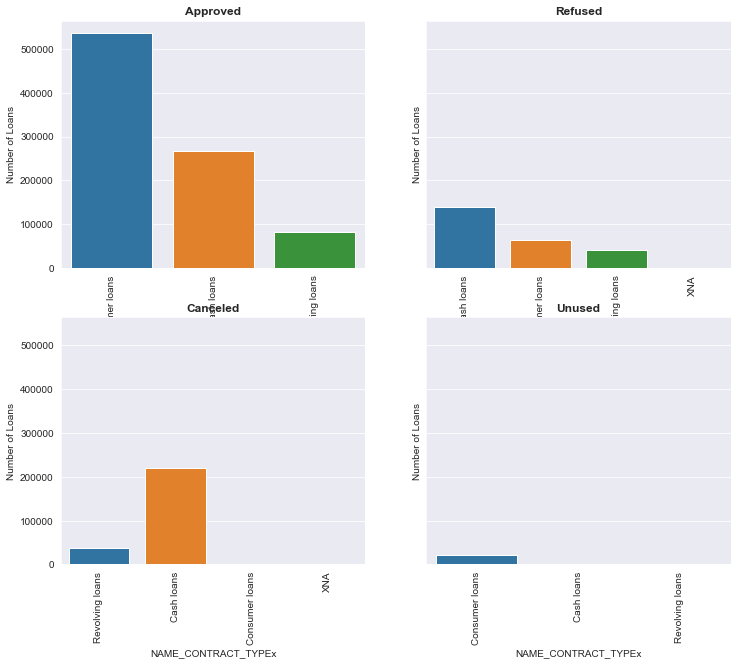

In [195]:
combined_plot('NAME_CONTRACT_TYPEx')
plt.show()

- We can infer that the consumer loans are highy approved under cash loans.

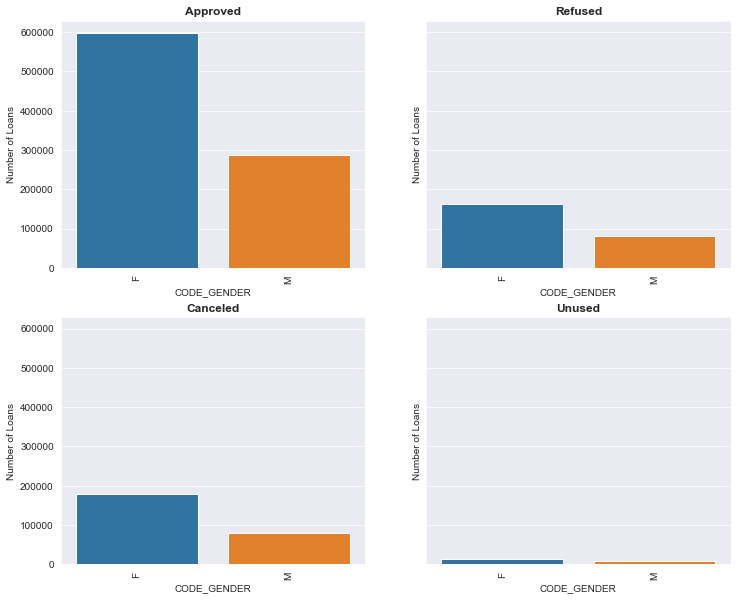

In [196]:
# CODE_GENDER:
combined_plot('CODE_GENDER')
plt.show()

- As we are noticing females are having more loan than males as well as approved.

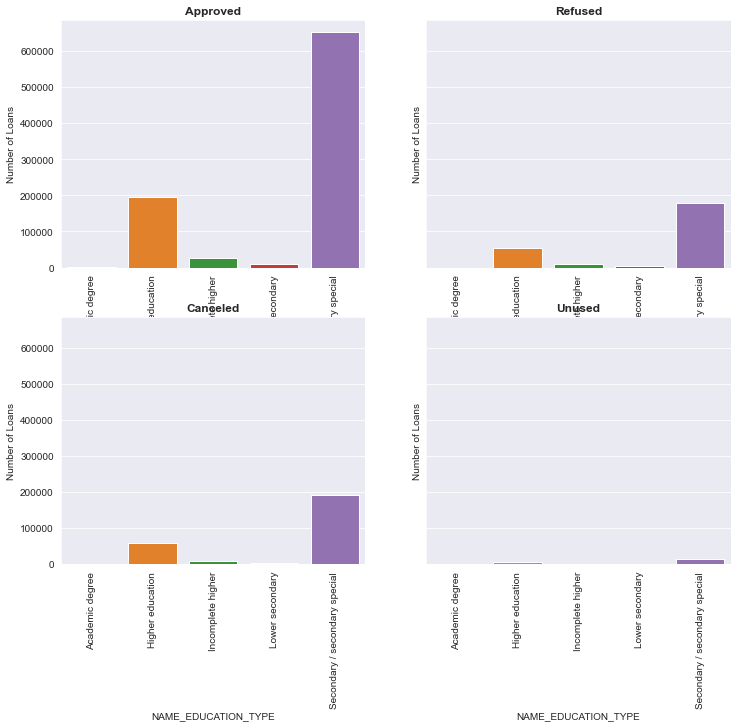

In [197]:
# NAME_EDUCATION_TYPE:

combined_plot('NAME_EDUCATION_TYPE')

plt.show()

- Secondary and secondary special type is higher in all the cases.

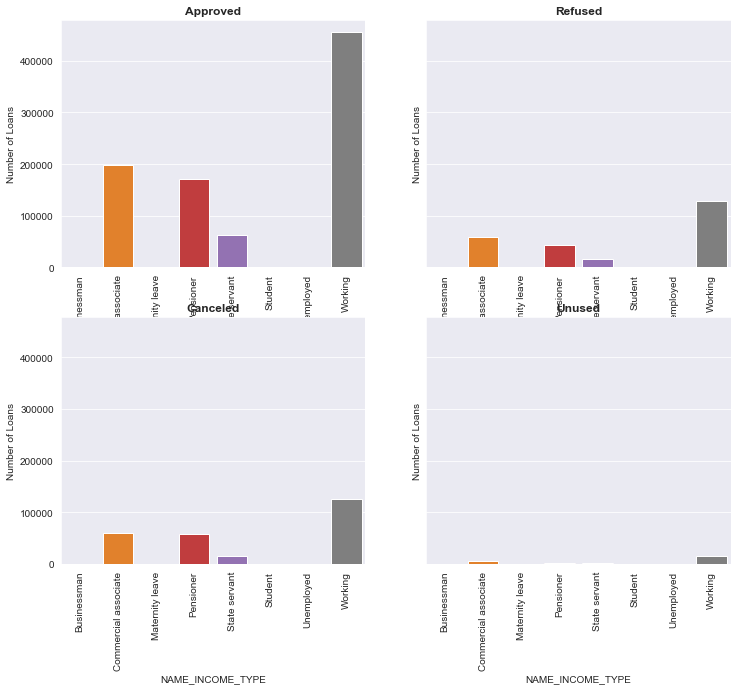

In [198]:
# NAME_INCOME_TYPE

combined_plot('NAME_INCOME_TYPE')

plt.show()

- working professionals are higher in all the cases.

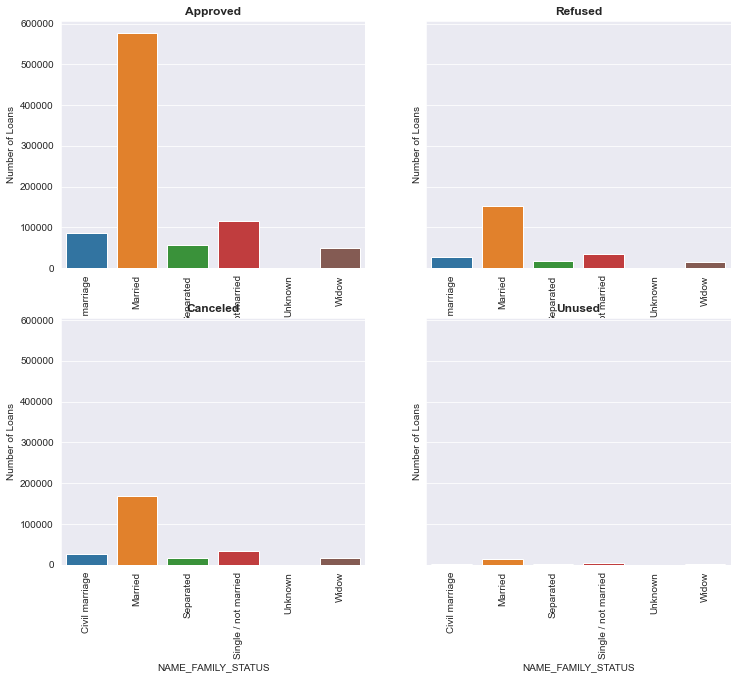

In [199]:
# NAME_FAMILY_STATUS

combined_plot('NAME_FAMILY_STATUS')

plt.show()

- married people are higher in all the cases.

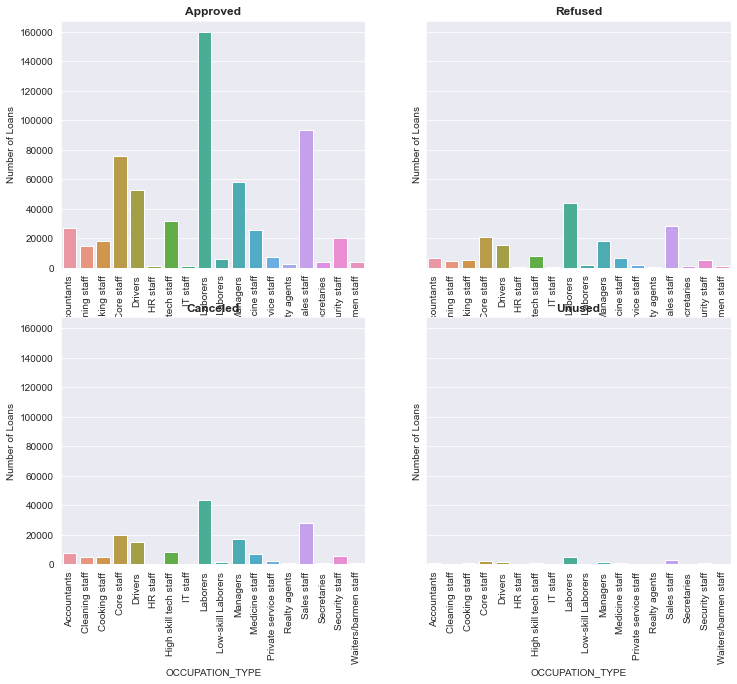

In [200]:
# OCCUPATION_TYPE
combined_plot('OCCUPATION_TYPE')
plt.show()

- laborers are higher in all the cases.

## Overall analysis leads us to following conclusions:

+ As per this case study, the kind of population which seems to have higher probability to get default towards their loan repayments are as follows.

- Married People
- Educational Class -> Secondary and secondary special
- Laborers
- Working Professionals

#  ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** ***************** 